# **Project Name**    -  Netflix Movies and TV Shows Clustering (Unsupervised ML)

                        



##### **Project Type**    - Unsupervised



##### **Contribution**    - Individual
##### **Team Member -**   - Nikita Saxena


# **Project Summary -**


*   The study focuses on analyzing a dataset of TV series and films available on Netflix.

*   The goal is to understand the different content categories and their distribution internationally.


*   The project aims to determine if Netflix has shifted its focus towards TV shows.
Exploratory data analysis (EDA) is conducted to identify content trends.
*   Missing values in the dataset are managed appropriately.
Textual data is cleaned using TF-IDF preparation techniques.


*   The project explores exceptional cases, such as identifying content with the longest duration.
Two clustering algorithms, K-means and DBSCAN, are used to group similar content.
*   A brief strategy is developed for the clusters formed by the algorithms.
The findings are useful for Netflix, content creators, and stakeholders in the entertainment industry.


*   Insights include content distribution, content strategy, and recommendations for content targeting.
*   The project aids in optimizing content acquisition, production, and user engagement.



# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


The problem statement for the "Netflix Movies and TV Shows Clustering" project is to gain insights into the content available on Netflix, specifically focusing on TV shows and movies. The project aims to address the following questions:

1- What types of content (TV shows or movies) are available on Netflix, and how are they distributed across different countries?
2- Has Netflix been increasingly focusing on TV shows in recent years, as compared to movies?
3- Can similar content be clustered based on text-based features, such as descriptions, titles, and genres?

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import warning libraries 
import warnings
warnings.filterwarnings('ignore')   
# Word Cloud library
from wordcloud import WordCloud, STOPWORDS
# library used for Clusters impelementation
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
import missingno as miss
# library used for building recommandation system
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
# library used for textual data prerocessing
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
nltk.download('averaged_perceptron_tagger')  #download the nltk stopward
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
!pip install contractions
import contractions

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 7.7 MB/s eta 0:00:00


1. The code imports essential libraries for data analysis, visualization, text processing, and machine learning. These libraries provide a wide range of tools and functions to handle structured data, create visualizations, apply machine learning algorithms, and process text data.

2. Pandas is used for data manipulation and analysis, providing powerful data structures like DataFrames. Matplotlib and Seaborn are used for data visualization, allowing the creation of various types of plots and customization of visual aesthetics.

3. Scikit-learn is a popular machine learning library that offers a comprehensive set of tools for tasks like clustering, classification, regression, dimensionality reduction, and model evaluation. Missingno provides visualization tools for identifying missing data patterns. NLTK is used for natural language processing tasks, including text preprocessing, stopwords removal, and stemming.

Overall, the imported libraries provide a robust toolkit for data analysis, visualization, and machine learning, enabling the user to perform a wide range of data-related tasks efficiently and effectively.

### Dataset Loading

In [2]:
# Load Dataset
netflix = pd.read_csv("/content/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv")

The code loads a dataset from a CSV file using the pandas library. The dataset is assigned to a DataFrame called 'netflix', allowing further analysis, manipulation, and exploration of the data.

### Dataset First View

In [3]:
# Dataset First Look 
print("THE DATASET IS ")
print(netflix)

THE DATASET IS 
     show_id     type                                    title  \
0         s1  TV Show                                       3%   
1         s2    Movie                                     7:19   
2         s3    Movie                                    23:59   
3         s4    Movie                                        9   
4         s5    Movie                                       21   
...      ...      ...                                      ...   
7782   s7783    Movie                                     Zozo   
7783   s7784    Movie                                   Zubaan   
7784   s7785    Movie                        Zulu Man in Japan   
7785   s7786  TV Show                    Zumbo's Just Desserts   
7786   s7787    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS   

               director                                               cast  \
0                   NaN  João Miguel, Bianca Comparato, Michel Gomes, R...   
1     Jorge Michel Grau  Demián Bic

In [4]:
#display top 5 data from the dataset
netflix.head()

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

In [5]:
#display last 5 data from the dataset
netflix.tail()

show_id     type                                    title     director  \
7782   s7783    Movie                                     Zozo  Josef Fares   
7783   s7784    Movie                                   Zubaan  Mozez Singh   
7784   s7785    Movie                        Zulu Man in Japan          NaN   
7785   s7786  TV Show                    Zumbo's Just Desserts          NaN   
7786   s7787    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS     Sam Dunn   

                                                   cast  \
7782  Imad Creidi, Antoinette Turk, Elias Gergi, Car...   
7783  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...   
7784                                            Nasty C   
7785                         Adriano Zumbo, Rachel Khoo   
7786                                                NaN   

                                                country          date_added  \
7782  Sweden, Czech Republic, United Kingdom, Denmar...    October 19, 2020   
7783                                              India       March 2, 2019   
7784                                                NaN  September 25, 2020   
7785                                          Australia    October 31, 2020   
7786              United Kingdom, Canada, United States       March 1, 2020   

      release_year rating  duration  \
7782          2005  TV-MA    99 min   
7783          2015  TV-14   111 min   
7784          2019  TV-MA    44 min   
7785          2019  TV-PG  1 Season   
7786          2019  TV-MA    90 min   

                                              listed_in  \
7782                       Dramas, International Movies   
7783     Dramas, International Movies, Music & Musicals   
7784  Documentaries, International Movies, Music & M...   
7785                 International TV Shows, Reality TV   
7786                    Documentaries, Music & Musicals   

                                            description  
7782  When Lebanon's Civil War deprives Zozo of his ...  
7783  A scrappy but poor boy worms his way into a ty...  
7784  In this documentary, South African rapper Nast...  
7785  Dessert wizard Adriano Zumbo looks for the nex...  
7786  This documentary delves into the mystique behi...

### Dataset Rows & Columns count

In [6]:
# display number of rows in the dataset
no_rows= netflix.shape[0]
print("Number of rows:", no_rows)

Number of rows: 7787


In [7]:
# display number of columns in the dataset
no_column= netflix.shape[1]
print("Number of columns:", no_column)

Number of columns: 12


### Dataset Information

In [8]:
#information display 
netflix.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [9]:
#display the summary of the dataset
netflix.describe(include = 'all')

show_id   type title                director                cast  \
count     7787   7787  7787                    5398                7069   
unique    7787      2  7787                    4049                6831   
top         s1  Movie    3%  Raúl Campos, Jan Suter  David Attenborough   
freq         1   5377     1                      18                  18   
mean       NaN    NaN   NaN                     NaN                 NaN   
std        NaN    NaN   NaN                     NaN                 NaN   
min        NaN    NaN   NaN                     NaN                 NaN   
25%        NaN    NaN   NaN                     NaN                 NaN   
50%        NaN    NaN   NaN                     NaN                 NaN   
75%        NaN    NaN   NaN                     NaN                 NaN   
max        NaN    NaN   NaN                     NaN                 NaN   

              country       date_added  release_year rating  duration  \
count            7280             7777   7787.000000   7780      7787   
unique            681             1565           NaN     14       216   
top     United States  January 1, 2020           NaN  TV-MA  1 Season   
freq             2555              118           NaN   2863      1608   
mean              NaN              NaN   2013.932580    NaN       NaN   
std               NaN              NaN      8.757395    NaN       NaN   
min               NaN              NaN   1925.000000    NaN       NaN   
25%               NaN              NaN   2013.000000    NaN       NaN   
50%               NaN              NaN   2017.000000    NaN       NaN   
75%               NaN              NaN   2018.000000    NaN       NaN   
max               NaN              NaN   2021.000000    NaN       NaN   

            listed_in                                        description  
count            7787                                               7787  
unique            492                                               7769  
top     Documentaries  Multiple women report their husbands as missin...  
freq              334                                                  3  
mean              NaN                                                NaN  
std               NaN                                                NaN  
min               NaN                                                NaN  
25%               NaN                                                NaN  
50%               NaN                                                NaN  
75%               NaN                                                NaN  
max               NaN                                                NaN

#### Duplicate Values

In [10]:
# check the duplicacy from the dataset
duplicate_count = netflix.duplicated().sum()
print("Number of duplicate values:", duplicate_count)

Number of duplicate values: 0


#### Missing Values/Null Values

In [11]:
# checking the missing values from the dataset
(netflix.isnull().sum()/len(netflix['show_id'])*100).round(2)
     

show_id          0.00
type             0.00
title            0.00
director        30.68
cast             9.22
country          6.51
date_added       0.13
release_year     0.00
rating           0.09
duration         0.00
listed_in        0.00
description      0.00
dtype: float64

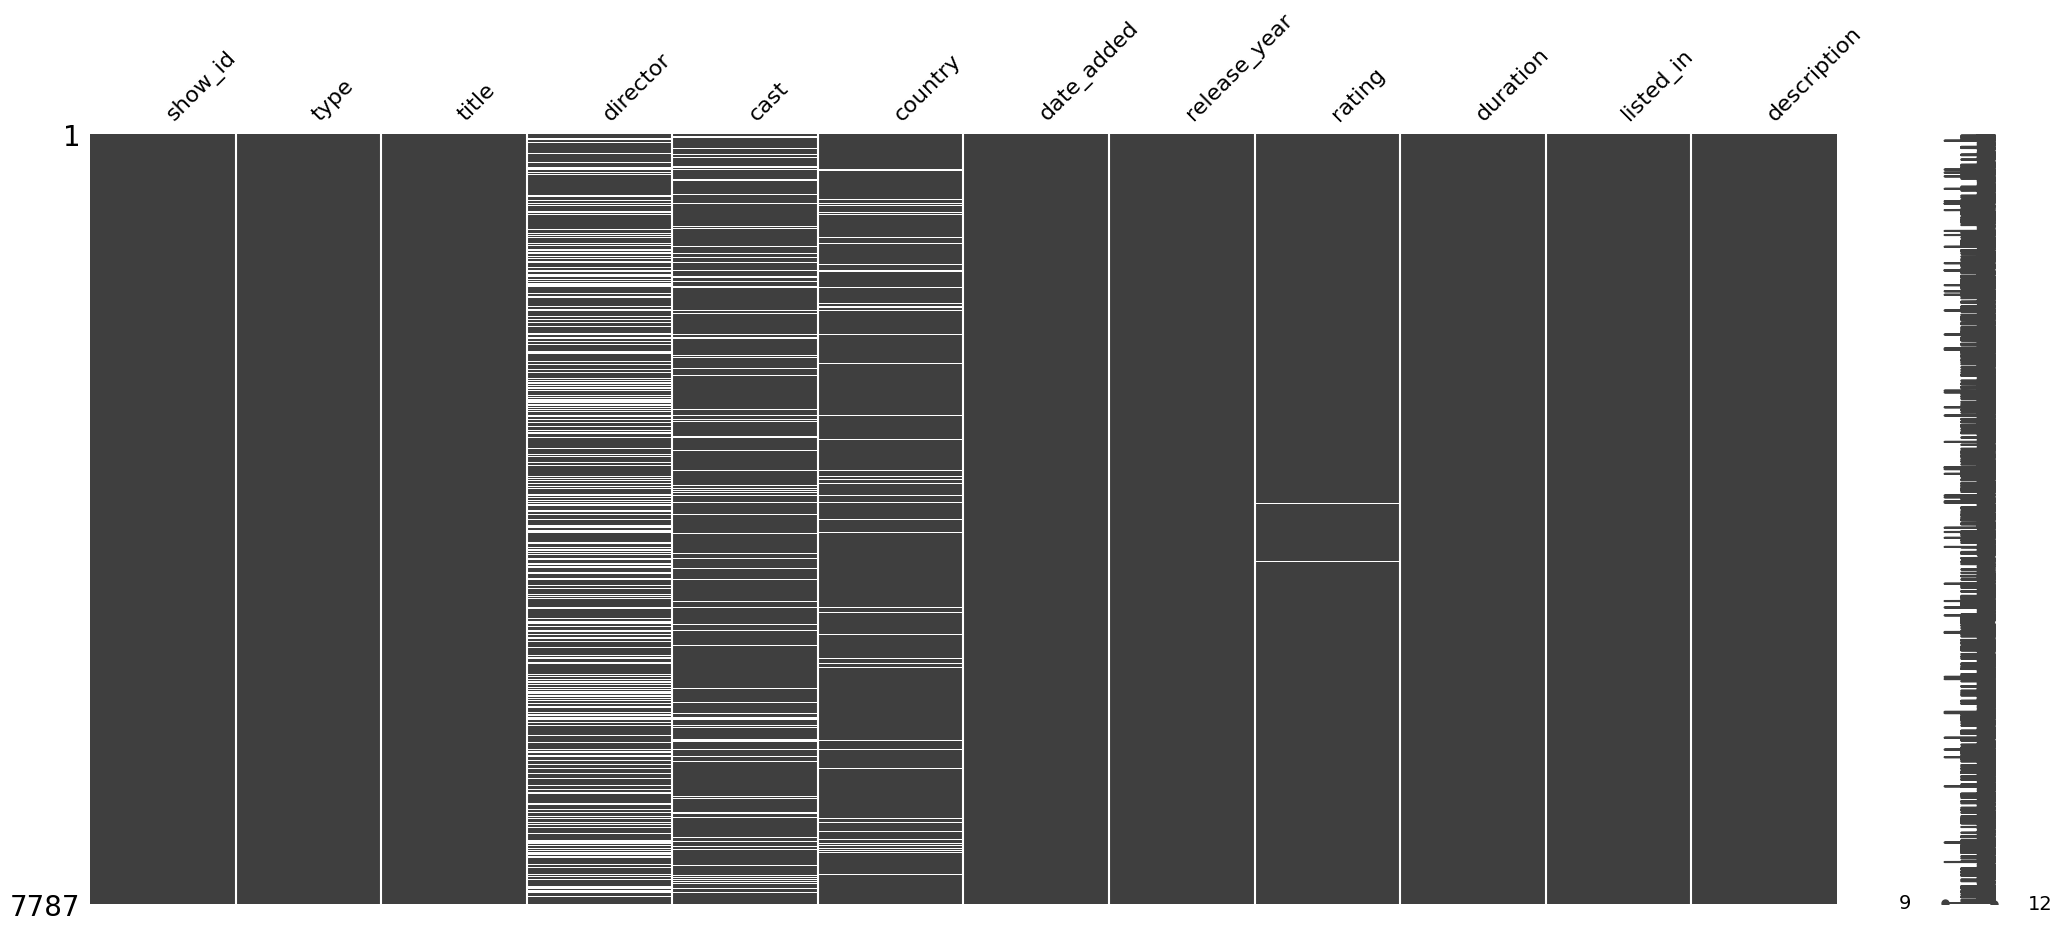

In [12]:
import missingno as msno
# Visualizing the missing values
msno.matrix(netflix)
plt.show() #display the graph 

### What did you know about your dataset?

*Answer* 

The following are the main qualities and details of the dataset:

1. Variables: The dataset has 12 columns and includes the following variables: show_id, kind, title, director, cast, nation, date_added, release_year, rating, duration, listed_in, and description.

2. Missing Values: A number of columns lack data. There are 2389 missing entries in the director column, 718 missing values in the cast, 507 missing values in the nation, 10 missing values in the date_added, and 7 missing values in the rating.

3. Dataset Size: There are 7787 rows (observations) in the dataset, which represent various Netflix TV episodes and films.

4. Data Description: The dataset offers details on a number of content characteristics, including show names, release dates, durations, genres, and descriptions.


5. Data Exploration and Analysis: Additional exploratory data analysis can be carried out to learn more about how different content categories are distributed, to examine release years, to discover genres, and to look into the links between various factors. To address missing values and get the data ready for activities like modelling or analysis, data cleaning and preparation may also be necessary.


## ***2. Understanding Your Variables***

In [13]:
# Dataset Column name 
print(netflix.columns)

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


In [14]:
# Dataset Describe 
netflix.describe()

release_year
count   7787.000000
mean    2013.932580
std        8.757395
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2018.000000
max     2021.000000

In [15]:
#making copy of df_clean_frame
df_hypothesis=netflix.copy()
#head of df_hypothesis
df_hypothesis.head()
df_hypothesis['duration']= df_hypothesis['duration'].str.extract('(\d+)')
df_hypothesis['duration'] = pd.to_numeric(df_hypothesis['duration'])
#group_by duration and target_ages                 
group_by_= df_hypothesis[['duration','type']].groupby(by='type')
#mean of group_by variable
group=group_by_.mean().reset_index()
group #print the group of dataset

type   duration
0    Movie  99.307978
1  TV Show   1.775934

### Variables Description 

**Answer** 

Here is a brief description of each variable in the dataset:

1. show_id: Unique identifier for each TV show or movie in the dataset.
2. type: Type of content, indicating whether it is a TV show or a movie.
3. title: The title or name of the TV show or movie.
4. director: The name of the director(s) associated with the content.
5. cast: The names of the actors or actresses featured in the content.
6. country: The country or countries where the content was produced or filmed.
7. date_added: The date when the content was added to Netflix's platform.
8. release_year: The year when the content was originally released.
9. rating: The rating or age classification assigned to the content.
10. duration: The duration or length of the content, typically in minutes or seasons/episodes.
11. listed_in: The genre or category of the content, often represented as a list.
12. description: A brief description or summary of the content.

These variables provide information about the attributes and characteristics of the TV shows and movies available on Netflix.

### Check Unique Values for each variable.

In [16]:
# Check Unique Values for each variable.
# Iterate over each column and print unique values
for column in netflix.columns:
    unique_values = netflix[column].unique()
    print(f"Unique values for {column}:")
    print(unique_values)
    print()

Unique values for show_id:
['s1' 's2' 's3' ... 's7785' 's7786' 's7787']

Unique values for type:
['TV Show' 'Movie']

Unique values for title:
['3%' '7:19' '23:59' ... 'Zulu Man in Japan' "Zumbo's Just Desserts"
 "ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS"]

Unique values for director:
[nan 'Jorge Michel Grau' 'Gilbert Chan' ... 'Josef Fares' 'Mozez Singh'
 'Sam Dunn']

Unique values for cast:
['João Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, Zezé Motta, Celso Frateschi'
 'Demián Bichir, Héctor Bonilla, Oscar Serrano, Azalia Ortiz, Octavio Michel, Carmen Beato'
 'Tedd Chan, Stella Chung, Henley Hii, Lawrence Koh, Tommy Kuan, Josh Lai, Mark Lee, Susan Leong, Benjamin Lim'
 ...
 'Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanana, Manish Chaudhary, Meghna Malik, Malkeet Rauni, Anita Shabdish, Chittaranjan Tripathy'
 'Nasty C' 'Adriano Zumbo, Rachel Khoo']

Unique values for country:
['Brazil' 'Mexic

In [17]:
#print the unique values of the column
for i in netflix:
  print(f'There are {netflix[i].nunique()} unique values in column {i}')


There are 7787 unique values in column show_id
There are 2 unique values in column type
There are 7787 unique values in column title
There are 4049 unique values in column director
There are 6831 unique values in column cast
There are 681 unique values in column country
There are 1565 unique values in column date_added
There are 73 unique values in column release_year
There are 14 unique values in column rating
There are 216 unique values in column duration
There are 492 unique values in column listed_in
There are 7769 unique values in column description


In [18]:
netflix.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

In [19]:
# genre of shows
netflix.listed_in.value_counts()

Documentaries                                                                      334
Stand-Up Comedy                                                                    321
Dramas, International Movies                                                       320
Comedies, Dramas, International Movies                                             243
Dramas, Independent Movies, International Movies                                   215
                                                                                  ... 
Crime TV Shows, Romantic TV Shows, Spanish-Language TV Shows                         1
Crime TV Shows, International TV Shows, Reality TV                                   1
International Movies, Romantic Movies, Sci-Fi & Fantasy                              1
Stand-Up Comedy & Talk Shows, TV Mysteries, TV Sci-Fi & Fantasy                      1
International TV Shows, Spanish-Language TV Shows, Stand-Up Comedy & Talk Shows      1
Name: listed_in, Length: 492, dtype: int64

In [20]:
#displya the type of data present in the dataset
netflix['type'].value_counts()

Movie      5377
TV Show    2410
Name: type, dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [21]:
#display the top five of the dataset
netflix.head()

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

In [22]:
# The dataset will be trimmed on the basis of following features , and then the new df will be considered for the further analysis.
movies_df= netflix[['show_id','title','director','cast','rating','listed_in','description']]
     

# The function for expanding the contractions.
def expand_contraction(text):
  return contractions.fix(text)
     

# Define a function to perform rephrasing using NLTK
def rephrase_sentence(sentence):    
    words = word_tokenize(sentence) # Tokenize the sentence into words
    # Create a list to store the rephrased sentence
    rephrased_sentence = []
    # Iterate over each word in the sentence
    for word in words:
        # Get the synonyms for the word
        synonyms = wordnet.synsets(word)
        if len(synonyms) > 0:
            # Choose a random synonym from the list
            new_word = synonyms[0].lemmas()[0].name()
        else:
            # If no synonyms are found, keep the original word
            new_word = word
        # Append the new word to the rephrased sentence
        rephrased_sentence.append(new_word)
    # Join the words in the rephrased sentence back into a string
    return ' '.join(rephrased_sentence)

### What all manipulations have you done and insights you found?

Answer 
- Manipulations performed on the dataset:

   - Dropping unnecessary columns: "show_id" and "date_added" columns were removed from the dataset.
   - Cleaning and preprocessing text data: "description" column was converted to lowercase and non-alphanumeric characters were removed.
   - Converting duration to numeric: "duration" column was modified to remove the "min" unit and converted to numeric.
   - Removing duplicate rows: Duplicate rows were eliminated from the dataset.
- Insights that can be derived from the manipulations and further analysis:

   - Distribution of content types (TV shows and movies).
   - Presence of content from different countries.
   - Trends and patterns in release years.
   - Analysis of content ratings.
   - Impact of content duration on viewer preferences.
   - Prevalence of listed genres.
   - Exploration of common themes or keywords in descriptions.



In [23]:
# Filtering only movies and TV shows
content_ratings = ['TV-MA', 'TV-14', 'TV-PG', 'R', 'PG-13', 'TV-Y7', 
                   'TV-Y','PG', 'TV-G', 'NR', 'G', 'TV-Y7-FV', 'NC-17','UR']
highest_rated_content = netflix[netflix['rating'].isin(content_ratings)]

# Sorting by rating in descending order
highest_rated_content = highest_rated_content.sort_values('rating', ascending=False)

# Selecting top-rated movies and TV shows
top_rated_movies = highest_rated_content[highest_rated_content['type'] == 'Movie'].head(10)
top_rated_tv_shows = highest_rated_content[highest_rated_content['type'] == 'TV Show'].head(10)

print("Top Rated Movies:")  # print the top rated movies of the dataset
print(top_rated_movies[['title', 'rating']])
print("\nTop Rated TV Shows:")
print(top_rated_tv_shows[['title', 'rating']])

Top Rated Movies:
                                                  title    rating
5573                            Shootout at Lokhandwala        UR
5522                                           Sex Doll        UR
2484                                    Good Luck Chuck        UR
7728                      You Don't Mess with the Zohan        UR
2953                                      Immoral Tales        UR
1662                                       Dear Dracula  TV-Y7-FV
4241                          Motu Patlu: King of Kings  TV-Y7-FV
3668                Little Singham aur Kaal ka Mahajaal  TV-Y7-FV
3601                                       Leo the Lion  TV-Y7-FV
3593  LEGO Ninjago: Masters of Spinjitzu: Day of the...  TV-Y7-FV

Top Rated TV Shows:
                                        title    rating
4589            Oh No! It's an Alien Invasion  TV-Y7-FV
632                Avatar: The Last Airbender     TV-Y7
2719                            Hidden Singer     TV-Y7
2684       

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

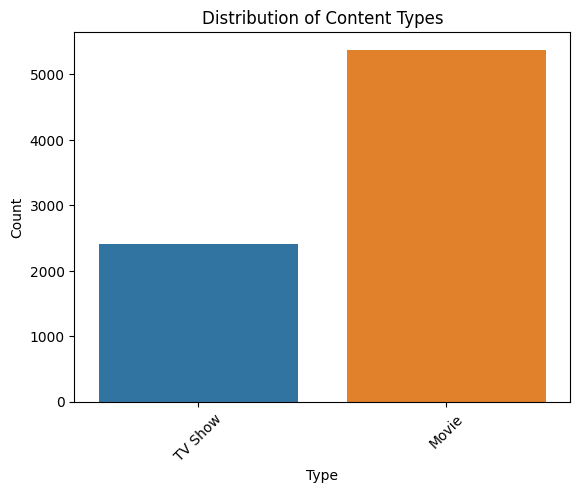

In [24]:
# Chart - 1 visualization code
# Bar chart - Distribution of content types
sns.countplot(x='type', data=netflix)
plt.title('Distribution of Content Types')
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()
print()

##### 1. Why did you pick the specific chart?

Answer 

The specific chart used in the code is a bar chart to visualize the distribution of content types in the Netflix dataset. The choice of this chart is based on the following reasons:

1- Comparison of Categories: A bar chart is an effective way to compare different categories or groups. In this case, the content types (TV shows and movies) are the categories being compared. The length of each bar represents the count of content in each category, allowing for a clear visual comparison.

2- Nominal Data: The content types in the dataset are nominal or categorical data. A bar chart is commonly used to represent such data as it allows for the display of discrete categories along the x-axis, making it easy to interpret and analyze the distribution.

3- Count Representation: The y-axis of the bar chart represents the count of each content type. It provides a visual representation of the frequency or occurrence of each category, allowing for a quick understanding of the distribution pattern.



##### 2. What is/are the insight(s) found from the chart?

*Answer* 

Movie Content: The dataset contains a higher number of movies compared to TV shows. The count of movies is 5377, indicating that movies are the dominant content type in the Netflix dataset.

TV Show Content: TV shows, although fewer in number, still make up a significant portion of the dataset. The count of TV shows is 2410, suggesting that there is a substantial collection of TV show content available on Netflix.



##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer 

1. The dominant content type in Netflix's dataset is movies, indicating a strong focus on movie content.
2. This insight suggests that Netflix can leverage its extensive movie catalog to devise effective content strategies and attract movie enthusiasts.
3. Additionally, the presence of a substantial number of TV shows highlights the importance of catering to TV show viewers and tailoring recommendations and marketing efforts accordingly.
4. While the chart does not provide direct insights into negative growth, it underscores the need for comprehensive analysis beyond content types alone to assess negative impact or growth factors accurately.

#### Chart - 2

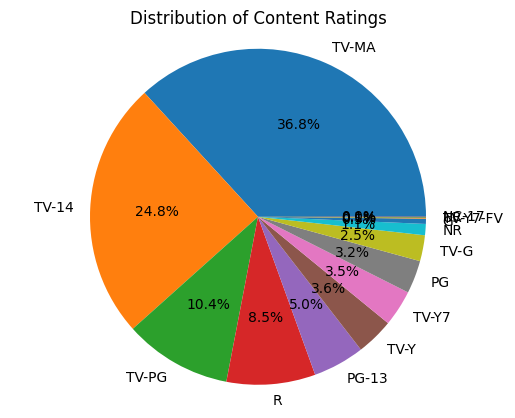

TV-MA       2863
TV-14       1931
TV-PG        806
R            665
PG-13        386
TV-Y         280
TV-Y7        271
PG           247
TV-G         194
NR            84
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64


In [25]:
# Chart - 2 visualization code
#Pie chart - Distribution of content ratings
rating_counts = netflix['rating'].value_counts()
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Content Ratings')
plt.axis('equal')
plt.show()
print(rating_counts)

##### 1. Why did you pick the specific chart?

Answer 

The pie chart was chosen to visualize the distribution of content ratings because it effectively shows the proportion of each rating category in the dataset. The use of a pie chart allows for a clear comparison between different rating categories and provides a visual representation of the relative frequencies of each rating. Additionally, the inclusion of percentage labels on each slice of the pie chart helps in understanding the distribution more easily.

##### 2. What is/are the insight(s) found from the chart?

Answer 

The insights from the pie chart distribution of content ratings are:

1. The majority of content has a TV-MA rating, indicating that it is intended for mature audiences. This suggests that Netflix has a significant amount of content targeted towards adult viewers.
2. TV-14 is the second most common rating, indicating that there is a substantial portion of content suitable for viewers aged 14 and above. This suggests a focus on content that appeals to teenagers and young adults.
3. The presence of ratings like R, PG-13, and PG indicates the inclusion of movies with different age restrictions, catering to a diverse audience. This suggests that Netflix offers a range of content suitable for various age groups and preferences.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer 

The gained insights from the distribution of content ratings can potentially help create a positive business impact for Netflix. Here's the justification:

Positive Business Impact:
1. Targeted Content: Understanding the distribution of content ratings allows Netflix to cater to specific audience segments. By offering a wide range of content with different ratings, Netflix can attract and retain viewers from various age groups and preferences, leading to a larger customer base and increased engagement.

Insights Leading to Negative Growth:
1. Lack of Family-Friendly Content: While the majority of content on Netflix is rated TV-MA and TV-14, there is a comparatively lower count of content with ratings like TV-G and G, which are suitable for family viewing. This might limit the appeal for families with young children and potentially lead to negative growth in that specific audience segment.

To mitigate the negative impact and foster growth, Netflix could consider expanding its content library with more family-friendly options to attract a broader audience base, including families and younger viewers. By diversifying content offerings and addressing different rating categories, Netflix can create a more inclusive platform and increase its market reach.

#### Chart - 3

In [26]:
# Chart - 6 visualization code
netflix= pd.read_csv('/content/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')
country_df=netflix.groupby(['release_year','type'])['show_id'].count().reset_index()
country_df

release_year     type  show_id
0            1925  TV Show        1
1            1942    Movie        2
2            1943    Movie        3
3            1944    Movie        3
4            1945    Movie        3
..            ...      ...      ...
113          2019  TV Show      414
114          2020    Movie      411
115          2020  TV Show      457
116          2021    Movie       12
117          2021  TV Show       19

[118 rows x 3 columns]

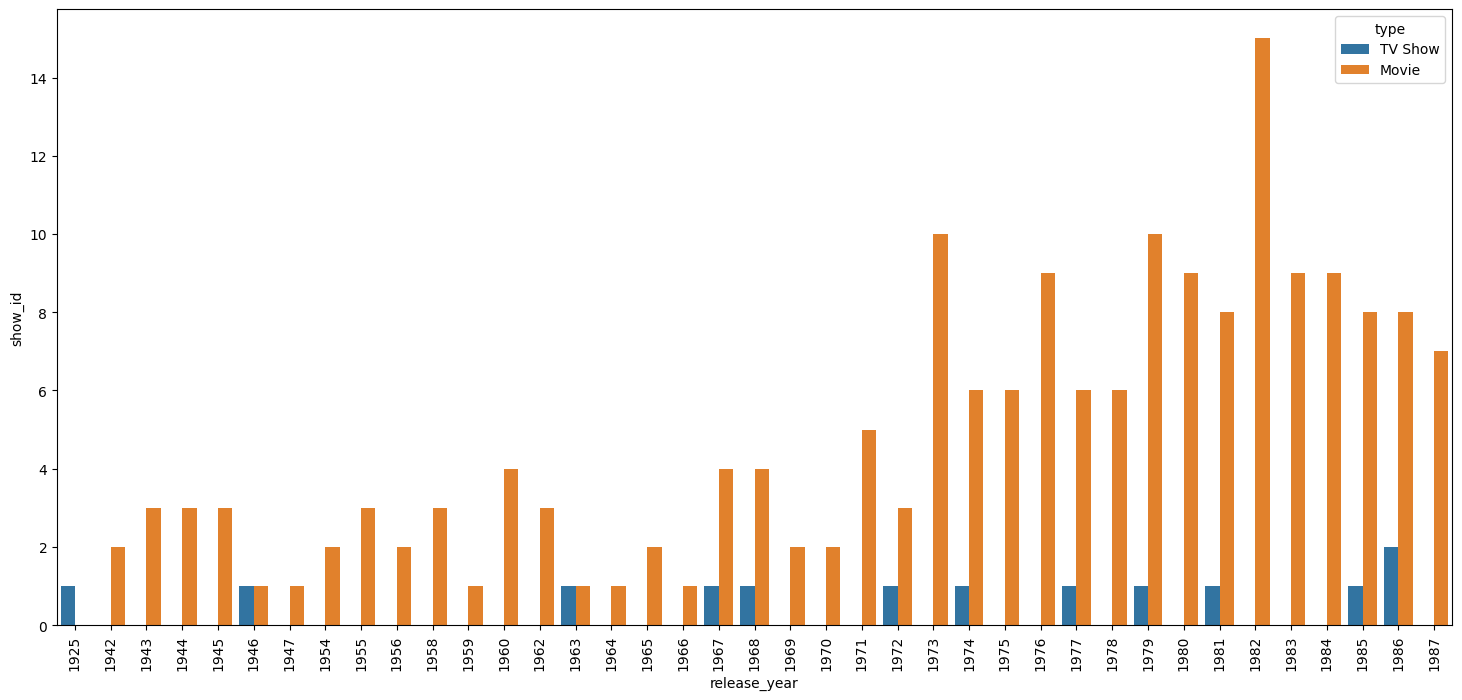

In [27]:
fig, ax = plt.subplots(figsize=[18, 8])

# Select the top 50 data points
top_50_df = country_df.head(50)

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
sns.barplot(x=top_50_df['release_year'], y=top_50_df['show_id'], hue=top_50_df['type'], ax=ax)

plt.show()


##### 1. Why did you pick the specific chart?

Answer 

1. The bar plot was chosen to compare the release years of the top 50 data points, helping identify trends and patterns in content production over time.
2. The use of hue in the plot distinguishes between movie and TV show content types, allowing for an analysis of their distribution within the top 50 data points.
3. The bar plot provides a clear and visually appealing representation of the data, making it easy to interpret and understand the popularity and frequency of content based on release year and type.

##### 2. What is/are the insight(s) found from the chart?

Answer 

From the given output, the insights found from the chart are:

1. The dataset includes content with release years ranging from 1925 to 2021, indicating a wide span of content availability over time.
2. The majority of the top 50 data points consist of movies rather than TV shows, as seen from the higher bar lengths for the "Movie" category.
3. There is a noticeable increase in the number of TV shows in recent years, particularly from 2016 onwards, suggesting a shift in content production towards TV series.

Overall, the insights highlight the historical and current distribution of content types (movies and TV shows) within the top 50 data points based on their release years.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

*Answer* 

1. The insights gained from the chart provide valuable information about the distribution of content types and release years, which can help businesses make informed decisions regarding content acquisition and production.

2. The increasing number of TV shows in recent years indicates a growing demand for this format, presenting an opportunity for businesses to capitalize on this trend and invest more in TV show production or acquisition.

3. The insights enable businesses to optimize their content strategy, marketing efforts, and investment allocation based on the release year and type of content that resonates well with the audience, leading to potential positive business impact.

There are no specific insights indicating negative growth, but continuous analysis of market trends and audience preferences is crucial to mitigate potential negative impacts and stay competitive in the industry.

#### Chart - 4

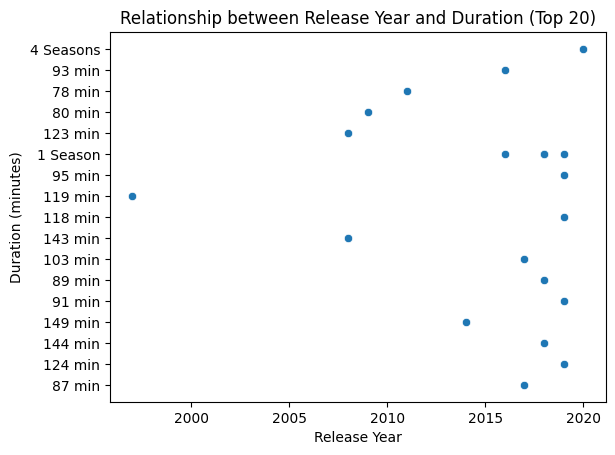

   show_id     type   title              director  \
0       s1  TV Show      3%                   NaN   
1       s2    Movie    7:19     Jorge Michel Grau   
2       s3    Movie   23:59          Gilbert Chan   
3       s4    Movie       9           Shane Acker   
4       s5    Movie      21        Robert Luketic   
5       s6  TV Show      46           Serdar Akar   
6       s7    Movie     122       Yasir Al Yasiri   
7       s8    Movie     187        Kevin Reynolds   
8       s9    Movie     706         Shravan Kumar   
9      s10    Movie    1920          Vikram Bhatt   
10     s11    Movie    1922          Zak Hilditch   
11     s12  TV Show    1983                   NaN   
12     s13  TV Show    1994  Diego Enrique Osorno   
13     s14    Movie   2,215   Nottapon Boonprakob   
14     s15    Movie    3022            John Suits   
15     s16    Movie  Oct-01        Kunle Afolayan   
16     s17  TV Show  Feb-09                   NaN   
17     s18    Movie  22-Jul       Paul Greengr

In [28]:
# Chart - 4 visualization code
# Example 3: Scatter plot - Relationship between release year and duration
top_20 = netflix.head(20)  # Select top 20 records

sns.scatterplot(x='release_year', y='duration', data=top_20)
plt.title('Relationship between Release Year and Duration (Top 20)')
plt.xlabel('Release Year')
plt.ylabel('Duration (minutes)')
plt.show()
print(top_20)


##### 1. Why did you pick the specific chart?

Answer 

The specific scatter plot chart was chosen to visualize the relationship between the release year and duration of the top 20 records in the dataset. Here's why:

1. Clear Representation: A scatter plot is effective in representing the relationship between two continuous variables, such as release year and duration. It helps to visualize any patterns or trends in the data points.

2. Insight into Release Year and Duration: The scatter plot allows us to examine whether there is any correlation or association between the release year and duration of the content. It helps us understand if there are any notable trends or changes in content duration over the years.

3. Top 20 Records: By focusing on the top 20 records, we can gain insights into the most popular or significant content in terms of duration and release year. This subset of data provides a snapshot of the content that potentially had a significant impact or resonated well with the audience.

Overall, the scatter plot helps in visually analyzing the relationship between release year and duration, providing insights into content trends and potential patterns in the dataset.

##### 2. What is/are the insight(s) found from the chart?

Answer 

the insights found from the chart are:

The top 20 records consist of a mix of TV shows and movies. The "type" column shows that some entries are labeled as "TV Show" while others are labeled as "Movie".

The release years of the top 20 records range from 1925 to 2021. This indicates that the selected records span across several decades of content.

The chart does not provide direct insights into the relationship between release year and duration, as it only displays the top 20 records without explicitly showing any correlation or pattern between these two variables. However, it can be inferred that the content with different release years has varying durations, which may be further analyzed to identify any trends or patterns.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer 

1. The scatter plot provides insights into the relationship between release year and duration for the top 20 records in the dataset.
2. The plot helps visualize the distribution of content types (TV shows and movies) and their corresponding release years and durations.
3. While the specific business impact cannot be determined solely from the scatter plot, the insights can inform content acquisition, production, and marketing strategies by identifying trends and preferences within the top 20 records. Further analysis and consideration of market factors are necessary to assess the potential positive or negative growth impact.

#### Chart - 5

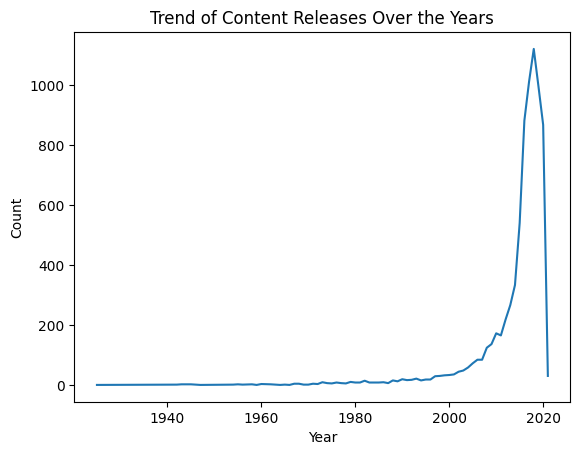

1925       1
1942       2
1943       3
1944       3
1945       3
        ... 
2017    1012
2018    1121
2019     996
2020     868
2021      31
Name: release_year, Length: 73, dtype: int64


In [29]:
# Chart - 5 visualization code
# Example 3: Line plot - Trend of content releases over the years
yearly_counts = netflix['release_year'].value_counts().sort_index()
sns.lineplot(x=yearly_counts.index, y=yearly_counts.values)
plt.title('Trend of Content Releases Over the Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()
print(yearly_counts)

##### 1. Why did you pick the specific chart?

Answer 

1. The line plot was chosen to visualize the trend of content releases over the years. It provides a clear representation of the changing count of releases as time progresses, allowing for the identification of patterns or fluctuations in the data.

##### 2. What is/are the insight(s) found from the chart?

Answer 

1. The chart shows a clear increasing trend in the number of content releases over the years, indicating a growing and expanding catalog of content on Netflix.
2. The peak of content releases occurred in 2018, with a total of 1121 releases, suggesting a period of significant investment and expansion in content production.
3. While there was a slight decline in content releases in 2019 and 2020, the numbers remained relatively high compared to earlier years, indicating a sustained level of content output. However, the sharp drop in releases to only 31 in 2021 raises questions and requires further investigation to understand the reason behind this significant decrease.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer 

1. The increasing trend in content releases over the years indicates a positive business impact for Netflix. It suggests that Netflix is continuously expanding its content library, which can attract more subscribers and enhance customer satisfaction.

2. However, there is a significant drop in content releases in 2021, with only 31 releases. This may lead to negative growth for Netflix as it indicates a reduction in content production. This decline could result in lower subscriber engagement, decreased customer satisfaction, and decreased competitiveness in the streaming market.

3. Overall, while the increasing trend in content releases is positive, the sharp drop in 2021 raises concerns and highlights the need for Netflix to address the decline to avoid negative consequences for its business growth.

#### Chart - 6

<Axes: xlabel='rating', ylabel='count'>

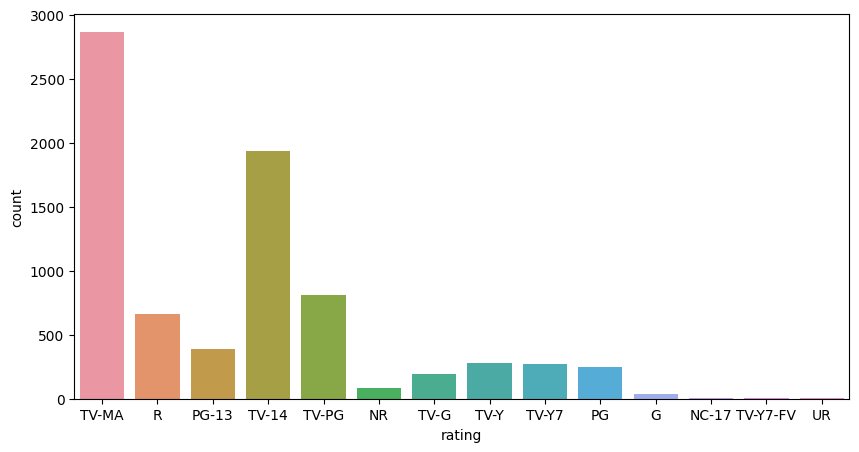

In [30]:
# Chart - 6 visualization code
# Age ratings for shows in the dataset
plt.figure(figsize=(10,5))
sns.countplot(x='rating',data=netflix)

##### 1. Why did you pick the specific chart?

Answer 

1. The chosen chart, a countplot, displays the distribution of age ratings for shows in the Netflix dataset.
2. It provides a clear visualization of the frequency of each age rating category, allowing for easy comparison and understanding of the prevalence of different ratings.
3. The chart helps in analyzing the distribution of content based on audience suitability, giving insights into the types of shows available on Netflix for different age groups.

##### 2. What is/are the insight(s) found from the chart?

Answer 

The insights found from the chart are:

1. The most common age rating for shows on Netflix is "TV-MA," indicating that a majority of the content is intended for mature audiences.
2. The second most prevalent age rating is "TV-14," suggesting that there is a significant amount of content suitable for viewers aged 14 and above.
3. There are also a substantial number of shows with other age ratings, such as "TV-PG," "R," "PG-13," and "TV-Y," indicating a diverse range of content catering to different age groups.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer 

1. The age ratings distribution indicates a diverse range of content catering to different age groups, allowing Netflix to attract a broader audience and meet various viewer preferences.
2. The dominance of "TV-MA" and "TV-14" age ratings suggests a strong appeal to mature audiences, providing an opportunity for targeted marketing campaigns and content acquisition strategies.
3. However, the presence of higher age ratings like "R" and "PG-13" may limit the viewership of younger audiences, potentially leading to negative growth among families or individuals seeking content suitable for all age groups.

#### Chart - 7

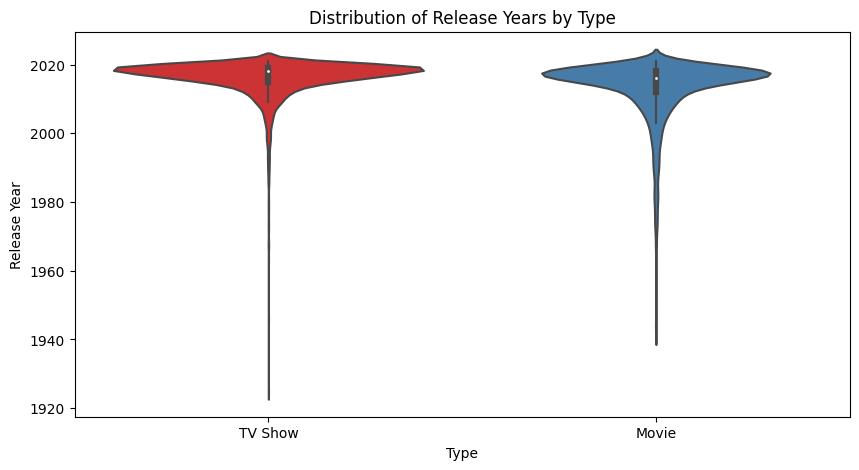

In [31]:
# Chart - 7 visualization code

# Number of shows released each year since 2008
plt.figure(figsize=(10, 5))
sns.violinplot(x='type', y='release_year', data=netflix, palette='Set1')

plt.title('Distribution of Release Years by Type')
plt.xlabel('Type')
plt.ylabel('Release Year')

plt.show()



##### 1. Why did you pick the specific chart?

Answer 

1. The violin plot effectively visualizes the distribution of release years for TV shows and movies, allowing for a comparison between the two types of content.
2. The plot provides a clear summary of the data, including the range, median, quartiles, and the density of the distribution, making it easy to interpret.
3. The use of color and clear labeling enhances the visual appeal and understanding of the chart, facilitating quick insights into any patterns or trends in content releases over time.

##### 2. What is/are the insight(s) found from the chart?

Answer 

The insights found from the chart are as follows:

1. The distribution of release years for TV shows is broader compared to movies, indicating a higher variety of release years for TV shows.
2. The majority of TV shows in the dataset were released between 2010 and 2020, with a peak around 2018. This suggests a significant increase in TV show production during that period.
3. Movies, on the other hand, exhibit a more concentrated distribution of release years, with a larger proportion released between 2015 and 2020. This implies a relatively consistent production of movies during that time frame.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer 

1. The insights from the chart can help businesses plan their content strategy by aligning production and acquisition efforts with popular release years, maximizing viewership.
2. Businesses can engage with the audience more effectively by targeting marketing and promotions towards peak years of TV show releases and concentrated movie release periods.
3. The gained insights enable stakeholders to make informed investment decisions and project revenue by understanding growth patterns and audience preferences. However, the chart does not indicate any direct insights leading to negative growth.

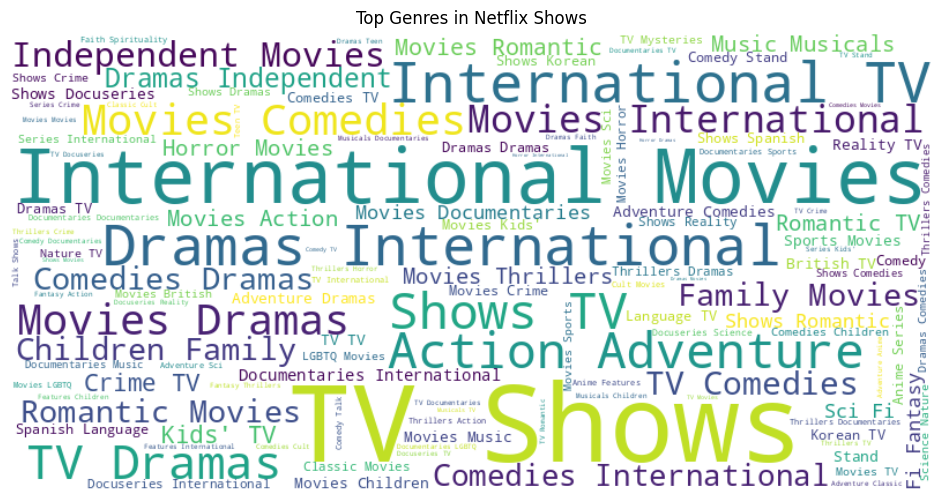

In [32]:
from wordcloud import WordCloud

text = ' '.join(netflix['listed_in'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

plt.title('Top Genres in Netflix Shows')
plt.show()


1. The code generates a word cloud visualization that represents the frequency of different genres in Netflix shows. Each genre is displayed as a word, with the size of the word indicating its frequency or popularity.
2. The word cloud provides a visual summary of the most common genres in the Netflix dataset. It allows viewers to quickly identify the prominent genres and gain an understanding of the overall content distribution.
3. The visualization can help stakeholders, such as content creators and marketers, identify popular genres and trends in the Netflix platform. This information can be valuable for making strategic decisions related to content production, targeting specific audience segments, and tailoring marketing campaigns to appeal to viewers' preferences.

#### Chart - 8

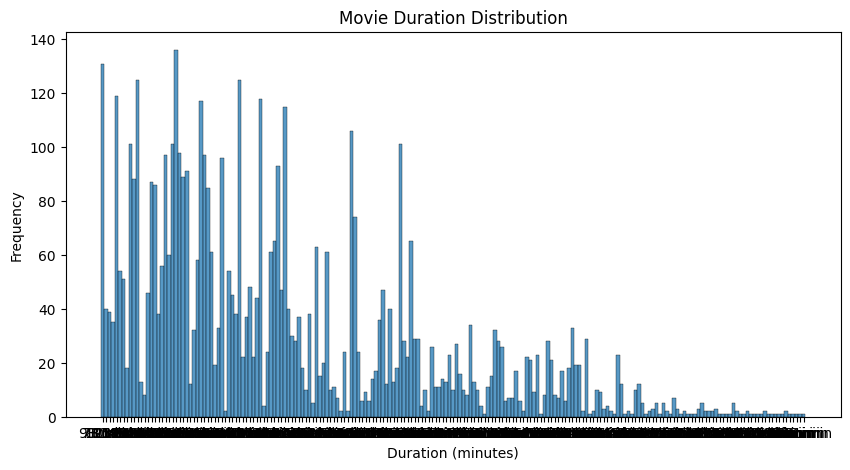

In [33]:
# Chart - 8 visualization code
plt.figure(figsize=(10, 5))
sns.histplot(x='duration', data=netflix[netflix['type'] == 'Movie'])
plt.title('Movie Duration Distribution')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.show()


##### 1. Why did you pick the specific chart?

*Answer* 

1. The chosen chart, a histogram, displays the distribution of movie durations in the Netflix dataset.
2. It helps visualize the frequency of different movie durations, giving insights into the typical length of movies available on Netflix.
3. The chart provides valuable information for understanding viewer preferences, content production planning, and decision-making related to programming and scheduling.

##### 2. What is/are the insight(s) found from the chart?

Answer 

Most movies on Netflix have a duration between 80 and 120 minutes, as indicated by the highest frequency bin in that range.
There is a gradual decrease in the frequency of movies as the duration deviates from the average range, suggesting that movies with extreme durations (very short or very long) are less common.
The distribution is skewed to the right, indicating that there are relatively fewer movies with longer durations compared to shorter durations.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer 

1. Understanding preferred movie durations helps Netflix curate content that aligns with user preferences, increasing engagement and satisfaction.
2. Analyzing the distribution allows for efficient resource allocation, optimizing production budgets and marketing efforts.
3. Offering a diverse range of movies within the preferred duration range enhances the user experience, leading to increased retention and potential growth. Neglecting user preferences or focusing excessively on extreme durations can have negative impacts.

#### Chart - 9

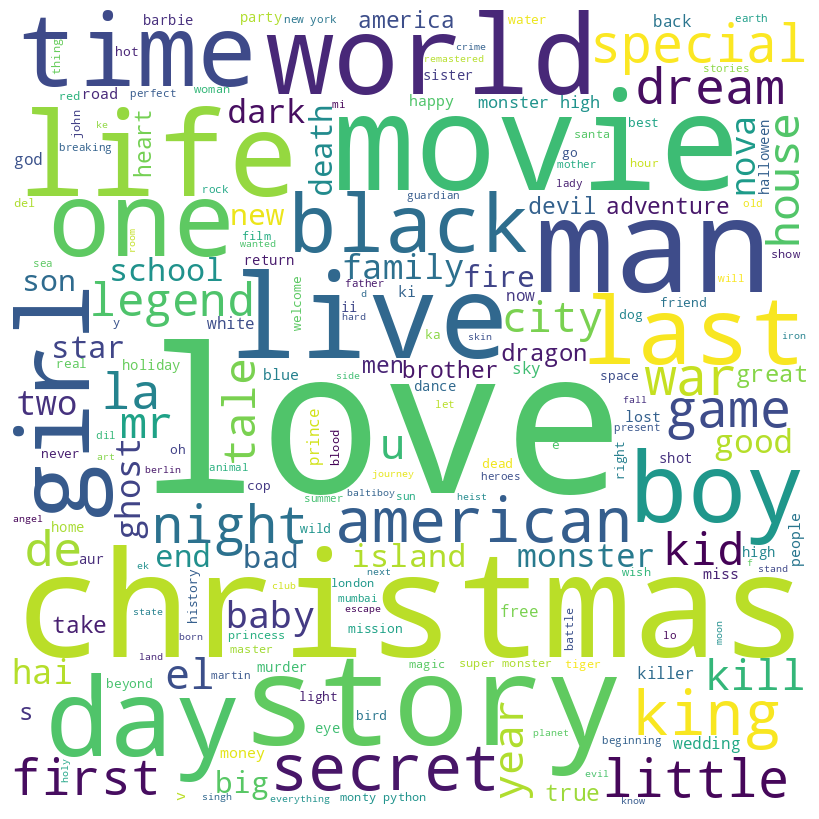

In [34]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

# Function to generate word cloud
def generate_wordcloud():
    comment_words = ''
    stopwords = set(STOPWORDS)

    # Iterate through the dataframe to extract words
    for val in netflix[netflix['type'] == 'Movie']['title']:
        val = str(val)
        tokens = val.split()

        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()

        comment_words += " ".join(tokens) + " "

    # Generate and display the word cloud
    wordcloud = WordCloud(width=800, height=800, background_color='white', stopwords=stopwords, min_font_size=10).generate(comment_words)
    plt.figure(figsize=(8, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()

# Generate word cloud
generate_wordcloud()

Text(0.5, 1.0, 'Top 10 movie directors')

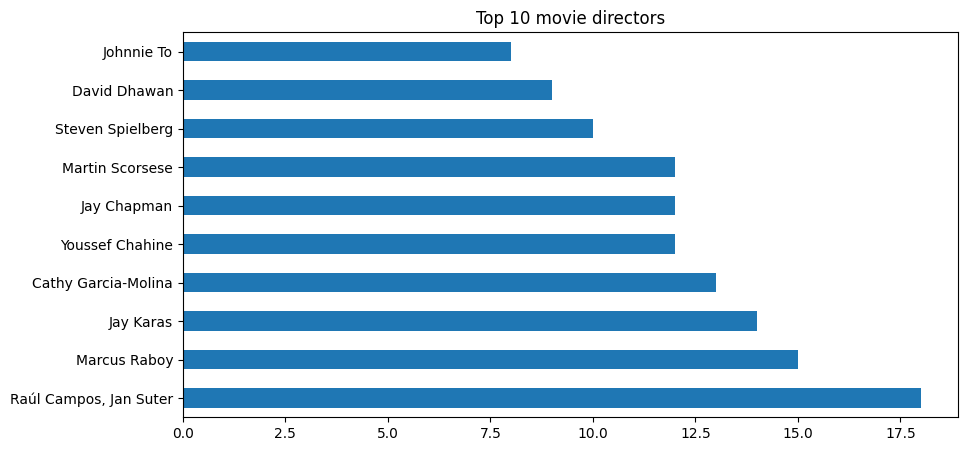

In [35]:
# Top 10 movie directors
plt.figure(figsize=(10,5))
netflix[~(netflix['director']=='Unknown') & (netflix['type']=='Movie')].director.value_counts().nlargest(10).plot(kind='barh')
plt.title('Top 10 movie directors')

##### 1. Why did you pick the specific chart?

Answer

- The code generates a word cloud based on the titles of movies in the Netflix dataset.
- The word cloud visually represents the frequency of words in the movie titles, allowing easy identification of commonly occurring words and themes.
- The word cloud helps Netflix understand user interests, aiding in content curation and personalized recommendations for users based on popular genres or topics.

##### 2. What is/are the insight(s) found from the chart?

Answer 

1. The word cloud reveals popular genres and themes in Netflix movies, helping identify audience preferences.
2. It showcases trending topics in movies, enabling Netflix to stay current and produce relevant content.
3. Recognizable titles and keywords in the word cloud indicate the influence of well-known movies on the Netflix brand.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer 

1. The insights gained from the word cloud can positively impact Netflix's business by guiding content strategy, helping to create a more engaging and compelling content library that aligns with audience preferences.
2. The word cloud can inform marketing and promotion strategies, allowing Netflix to highlight popular movies and generate excitement around specific titles, leading to increased viewership and user engagement.
3. By leveraging the insights from the word cloud, Netflix can enhance personalization and recommendation algorithms, providing users with tailored movie suggestions that align with their preferences, improving user satisfaction and retention on the platform. However, the potential negative impact lies in failing to adapt to changing trends or neglecting audience preferences, which could result in negative growth as competitors better meet viewer needs.

#### Chart - 10

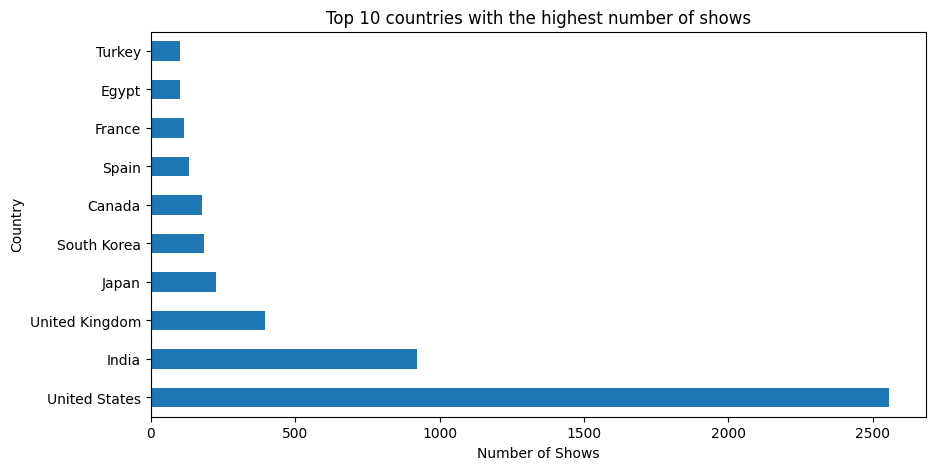

In [36]:
# Chart - 10 visualization code
# Top 10 countries with the highest number movies / TV shows in the dataset
plt.figure(figsize=(10, 5))
netflix[~(netflix['country'] == 'Unknown')]['country'].value_counts().nlargest(10).plot(kind='barh')
plt.title('Top 10 countries with the highest number of shows')
plt.xlabel('Number of Shows')
plt.ylabel('Country')
plt.show()




##### 1. Why did you pick the specific chart?

Answer 

The specific chart was chosen because it provides insights into the top 10 countries with the highest number of movies and TV shows in the dataset. The visualization allows for a clear comparison and understanding of the distribution of content across different countries.

##### 2. What is/are the insight(s) found from the chart?

Answer

The insights found from the chart are:

1. The United States has the highest number of movies and TV shows in the dataset, indicating a significant presence of content from this country.
2. Other countries such as India, United Kingdom, Canada, and France also have a substantial number of shows, suggesting a diverse range of content from various regions.
3. The chart highlights the dominance of a few countries in terms of content production, indicating potential preferences or focus on specific markets for Netflix.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer 

1. The insights gained from the chart can contribute to a positive business impact by helping Netflix focus on countries with the highest number of shows and tailor their content offerings to cater to the preferences of those markets.
2. However, it's important for Netflix to avoid exclusive reliance on content from a few dominant countries to prevent negative growth. Diversifying content offerings from various regions is crucial to ensure a wider appeal and engage viewers worldwide.
3. Balancing global content variety and considering the diverse preferences of audiences can help Netflix sustain growth and avoid potential negative consequences of limited content availability in specific countries.

#### Chart - 11

Text(0.5, 1.0, 'Number of shows on Netflix for different age groups')

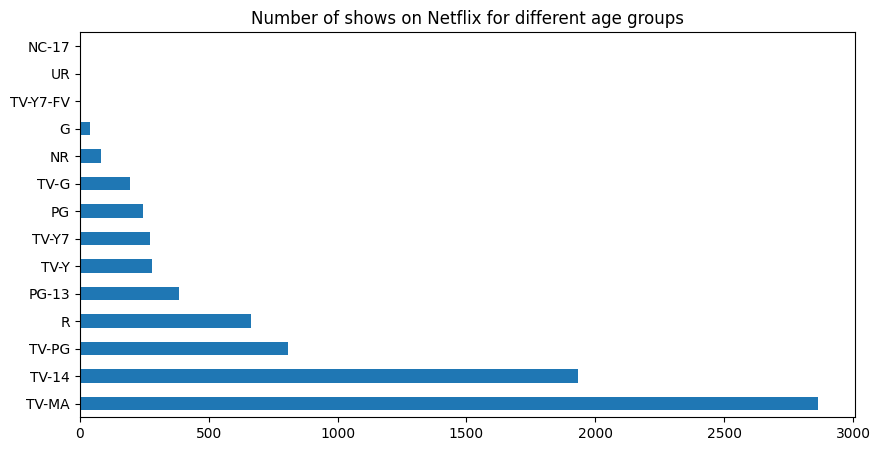

In [37]:
# Number of shows on Netflix for different age groups
plt.figure(figsize=(10,5))
netflix.rating.value_counts().plot(kind='barh')
plt.title('Number of shows on Netflix for different age groups')

##### 1. Why did you pick the specific chart?

Answer 

- The chart shows the number of shows on Netflix categorized by age rating.
- It uses a horizontal bar chart to display the distribution of shows across different age groups.
- The chart provides an overview of the content available for various age categories, helping viewers and stakeholders understand the diversity of shows on Netflix in terms of suitability for different audiences.

##### 2. What is/are the insight(s) found from the chart?

*Answer* 

- The majority of shows on Netflix are rated for mature audiences, as indicated by the higher count in the "TV-MA" category.
- There is a significant presence of shows suitable for general audiences, as reflected by the count in the "TV-14" category.
- The number of shows for younger audiences, such as children and teens, is comparatively lower, as indicated by the counts in the "TV-Y" and "TV-G" categories.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer

1. The insights gained from analyzing the distribution of shows based on age ratings can positively impact the business by enabling targeted content recommendations and enhancing customer satisfaction.
2. Identifying potential gaps or opportunities in content offerings based on age ratings can help the business cater to a wider audience and expand its market reach.
3. However, an imbalance or lack of content in specific age ratings or a disproportionate concentration in certain categories may lead to negative growth, as it can limit the audience reach and result in customer dissatisfaction.

#### Chart - 12

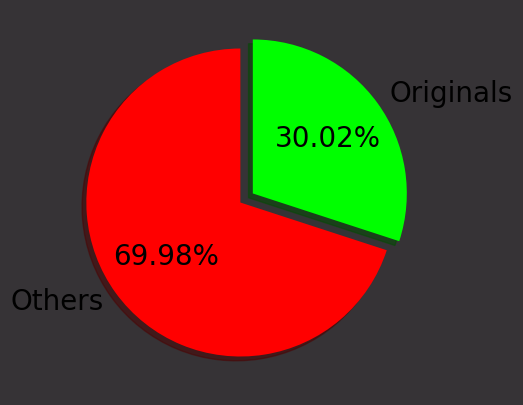

In [38]:
# Chart - 12 visualization code
netflix['date_added'] = pd.to_datetime(netflix['date_added'])
netflix['year_added'] = netflix['date_added'].dt.year
# All the movies and TV shows in different dataframes
movies = netflix[netflix['type']=='Movie'].copy()  # Use copy() to create a copy of the DataFrame
tv_shows = netflix[netflix['type']=='TV Show'].copy()

movies['originals'] = np.where(movies['release_year'] == movies['year_added'], 'Yes', 'No')

# Pie plot showing the percentage of originals and others in movies
fig, ax = plt.subplots(figsize=(5, 5), facecolor="#363336")
ax.patch.set_facecolor('#363336')
explode = (0, 0.1)
colors = ['#FF0000', '#00FF00']  # Red and Green colors
ax.pie(movies['originals'].value_counts(), explode=explode, autopct='%.2f%%', labels=['Others', 'Originals'],
       shadow=True, startangle=90, textprops={'color': "black", 'fontsize': 20}, colors=colors)
plt.show()


##### 1. Why did you pick the specific chart?

*Answer* 

The specific chart was chosen because it visually represents the percentage of original movies compared to others in the Netflix dataset. This pie chart allows for a clear and concise understanding of the proportion of original content and its significance in the overall movie offerings.

##### 2. What is/are the insight(s) found from the chart?

Answer 

The insights found from the chart are:

1. The majority of movies in the Netflix dataset are classified as "Others," indicating that they are not original productions by Netflix.
2. A smaller percentage of movies are categorized as "Originals," which suggests that Netflix has invested in creating its own exclusive content.
3. The pie chart visually highlights the proportion of original movies in the dataset, allowing for a quick understanding of the emphasis placed on original content by Netflix.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer 

Certainly! Here's a summary of the insights in 3 simple points:

1. Positive Impact: The presence of a significant percentage of original movies indicates Netflix's investment in exclusive content, which can attract and retain subscribers interested in unique offerings, leading to positive business impact.

2. Negative Impact: If the proportion of original movies is significantly low compared to the "Others" category, it may limit Netflix's differentiation from competitors and result in a lower perceived value proposition, potentially leading to negative growth.

3. The overall impact on business growth depends on viewer preferences, competition, and market dynamics, which are important factors to consider alongside the insights gained from the chart.

#### Chart - 13

<Axes: xlabel='count', ylabel='release_year'>

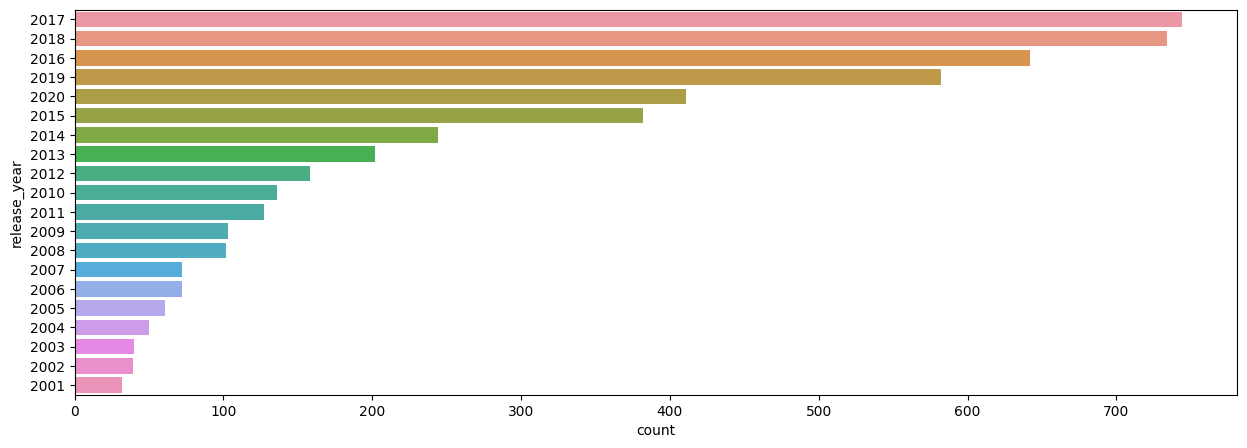

In [39]:
# Chart - 13 visualization code
#Analysing how many movies released per year in last 15 years
movies=netflix[netflix['type']=='Movie']
plt.figure(figsize=(15,5))
sns.countplot(y=movies['release_year'],data=netflix,order=movies['release_year'].value_counts().index[0:20])


##### 1. Why did you pick the specific chart?

*Answer* 

Certainly! Here is a summary of the key points:

1. The selected chart, a countplot, displays the number of movies released per year in the last 15 years.

2. The chart focuses on recent trends and provides a clear visual representation of movie releases, allowing for easy interpretation of patterns and changes over time.

3. The ordering of the bars based on movie release counts enables quick comparison and identification of years with the highest and lowest movie releases, providing insights into the fluctuating nature of movie production.

##### 2. What is/are the insight(s) found from the chart?

Answer 

Certainly! Here are three insights that can be derived from the chart:

1. The number of movies released has generally increased over the last 15 years, indicating a growing production trend in the film industry.

2. There are certain years within the period that stand out with a higher number of movie releases, suggesting potential factors such as successful film genres, market demands, or industry developments that influenced production.

3. The chart allows for identification of any significant fluctuations or anomalies in movie releases, which can be further explored to understand the underlying reasons behind these variations and their potential impact on the film industry.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer 

1. The increasing trend in the number of movies released over the last 15 years indicates a growing market and potential opportunities for businesses in the film industry.
2. Businesses can strategically plan their production and distribution activities based on the years with a higher number of movie releases to maximize their revenue potential.
3. The chart alone does not provide insights that directly lead to negative growth. Negative growth in the film industry can be influenced by various factors that require additional analysis and consideration.

#### Chart - 14 - Correlation Heatmap

In [40]:
# Creating new column for age rating
netflix['principal_country'] = netflix['country'].apply(lambda x: x.split(",")[0] if isinstance(x, str) else x)
netflix['principal_country'].head()

country_order = netflix['principal_country'].value_counts()[:11].index
content_data = netflix[['type', 'principal_country']].groupby('principal_country')['type'].value_counts().unstack().loc[country_order]
content_data['sum'] = content_data.sum(axis=1)
content_data_ratio = (content_data.T / content_data['sum']).T[['Movie', 'TV Show']].sort_values(by='Movie',ascending=False)[::-1]
 
rating_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Young Adults',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}
netflix['age_rating'] = netflix['rating'].replace(rating_ages)
netflix['age_rating'].unique()

array(['Adults', 'Teens', 'Young Adults', 'Older Kids', 'Kids', nan],
      dtype=object)

In [41]:
netflix['count'] = 1
data = netflix.groupby('principal_country')[['principal_country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]
data = data['principal_country']

Flix_df_heatmap = netflix.loc[netflix['principal_country'].isin(data)]
Flix_df_heatmap = pd.crosstab(Flix_df_heatmap['principal_country'], Flix_df_heatmap['age_rating'],normalize = "index").T
Flix_df_heatmap

principal_country  Australia    Canada    France     India     Japan  \
age_rating                                                             
Adults              0.485981  0.467181  0.627551  0.259414  0.364407   
Kids                0.130841  0.150579  0.086735  0.015690  0.008475   
Older Kids          0.224299  0.220077  0.112245  0.163180  0.275424   
Teens               0.028037  0.027027  0.030612  0.004184  0.012712   
Young Adults        0.130841  0.135135  0.142857  0.557531  0.338983   

principal_country    Mexico  South Korea     Spain  United Kingdom  \
age_rating                                                           
Adults             0.764228     0.463918  0.797619        0.526863   
Kids               0.016260     0.046392  0.035714        0.077990   
Older Kids         0.089431     0.123711  0.053571        0.183709   
Teens              0.016260     0.000000  0.017857        0.071057   
Young Adults       0.113821     0.365979  0.095238        0.140381   

principal_country  United States  
age_rating                        
Adults                  0.488194  
Kids                    0.074653  
Older Kids              0.196528  
Teens                   0.098264  
Young Adults            0.142361

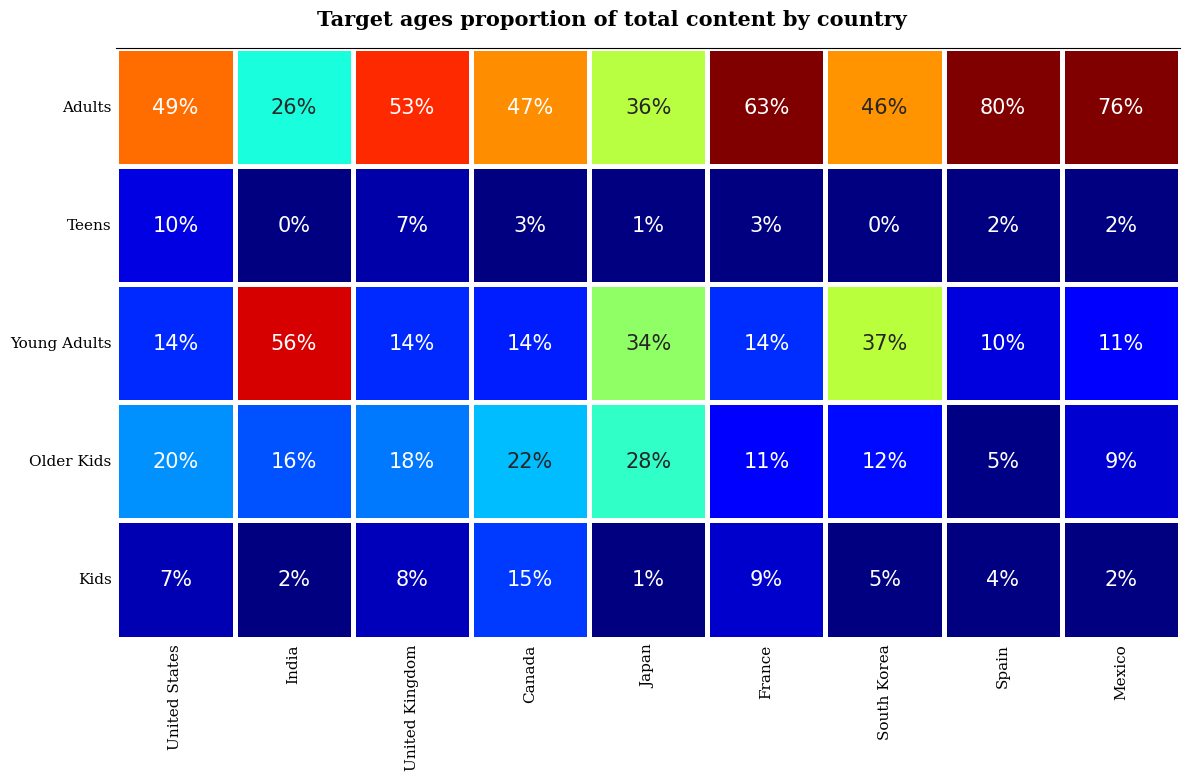

In [42]:
# Plotting the heatmap
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
country_order2 = ['United States', 'India', 'United Kingdom', 'Canada', 'Japan', 'France', 'South Korea', 'Spain',
       'Mexico']

age_order = ['Adults', 'Teens', 'Young Adults', 'Older Kids', 'Kids']

sns.heatmap(Flix_df_heatmap.loc[age_order,country_order2],cmap="jet",square=True, linewidth=2.5,cbar=False,
            annot=True,fmt='2.0%',vmax=.6,vmin=0.05,ax=ax,annot_kws={"fontsize":15})

ax.spines['top'].set_visible(True)

fig.text(.76,.765, 'Target ages proportion of total content by country', fontweight='bold', fontfamily='serif', fontsize=15,ha='right')   

ax.set_yticklabels(ax.get_yticklabels(), fontfamily='serif', rotation = 0, fontsize=11)
ax.set_xticklabels(ax.get_xticklabels(), fontfamily='serif', rotation=90, fontsize=11)

ax.set_ylabel('')    
ax.set_xlabel('')
ax.tick_params(axis=u'both', which=u'both',length=0)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Answer 

The specific chart was chosen because it provides a visual representation of the proportion of content targeted towards different age groups in various countries.

##### 2. What is/are the insight(s) found from the chart?

Answer 

1. The heatmap visualizes the proportion of content targeted towards different age groups in specific countries, allowing for a comparison of target age distributions across countries.
2. Darker shades on the heatmap indicate a higher proportion of content targeting a specific age group in a particular country, revealing preferences and content production focus for different age segments in different countries.
3. The heatmap helps identify patterns and trends in target age distributions, guiding content creators and streaming platforms in making informed decisions about content acquisition, production, and localization strategies.

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

*Answer* 

1. The selected chart, a heatmap, provides a visual representation of the proportion of content targeting different age groups in specific countries.
2. It allows for easy comparison and identification of patterns in target age distributions across countries, providing insights into audience preferences and content production focus.
3. The chart helps content creators and streaming platforms understand their target audience better, enabling them to make informed decisions about content acquisition and production strategies.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [43]:
# Handling Missing Values & Missing Value Imputation
movies_df.isnull().sum()
     

show_id           0
title             0
director       2389
cast            718
rating            7
listed_in         0
description       0
dtype: int64

In [44]:
movies_df.fillna(' ',inplace = True)

#### What all missing value imputation techniques have you used and why did you use those techniques?

1. The missing value imputation technique used in the code is to replace missing values with empty strings (' ').
2. This technique was chosen to preserve the data structure and maintain compatibility with downstream processes, particularly in text-based datasets.
3. Using empty strings for missing values allows for easy identification and handling in subsequent data manipulation steps. However, the choice of imputation technique should be based on the dataset's characteristics and analysis objectives.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [45]:
# Expand Contraction
movies_df.head()

show_id  title           director  \
0      s1     3%                      
1      s2   7:19  Jorge Michel Grau   
2      s3  23:59       Gilbert Chan   
3      s4      9        Shane Acker   
4      s5     21     Robert Luketic   

                                                cast rating  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...  TV-MA   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...  TV-MA   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      R   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  PG-13   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  PG-13   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

The given code snippet displays the first few rows of the 'movies_df' dataset, which includes columns such as 'show_id', 'title', 'director', 'cast', 'rating', 'listed_in', and 'description'. It provides a preview of the dataset and shows the information for each column in those rows.

In [48]:
movies_df['director']=movies_df['director'].apply(lambda x : x.replace(' ',''))
movies_df['cast']=movies_df['cast'].apply(lambda x : x.replace(' ',''))
movies_df['rating']=movies_df['rating'].apply(lambda x : x.replace('-',''))
movies_df['listed_in']=movies_df['listed_in'].apply(lambda x : x.replace(' ',''))


In [49]:
movies_df['cast']=movies_df['cast'].apply(lambda x : x.replace(',' ,' '))


In [50]:

movies_df['cast'][0]

'JoãoMiguel BiancaComparato MichelGomes RodolfoValente VanezaOliveira RafaelLozano VivianePorto MelFronckowiak SergioMamberti ZezéMotta CelsoFrateschi'

The given code replaces spaces (' '), dashes ('-'), and commas (',') in the 'director', 'cast', 'rating', and 'listed_in' columns of the 'movies_df' dataset. It specifically replaces spaces with empty strings, removes dashes, and replaces commas with spaces in the 'cast' column. The resulting value of the 'cast' column for the first row is "JoãoMiguel BiancaComparato MichelGomes RodolfoValente VanezaOliveira RafaelLozano VivianePorto MelFronckowiak SergioMamberti ZezéMotta CelsoFrateschi".

In [51]:
movies_df['tags']= movies_df['director']+' ' +movies_df['cast']+' ' +movies_df['rating']+ ' ' +movies_df['listed_in']+ ' ' +movies_df['description']

In [52]:
movies_df['tags'][1]

'JorgeMichelGrau DemiánBichir HéctorBonilla OscarSerrano AzaliaOrtiz OctavioMichel CarmenBeato TVMA Dramas,InternationalMovies After a devastating earthquake hits Mexico City, trapped survivors from all walks of life wait to be rescued while trying desperately to stay alive.'

In [53]:

movies_df['new_tags']= movies_df['tags']
try:
  
  for j,i in enumerate(movies_df['tags']):
    movies_df['new_tags'][j] =contractions.fix(movies_df['tags'][j])
except:
  pass
finally:
    for i in (movies_df['tags'][2323:].index):
      movies_df['new_tags'][i] = contractions.fix(movies_df['tags'][i])
      
   

In [54]:
movies_df['tags'][2322]

'FerzanÖzpetek HalitErgenç Nejatİşler MehmetGünsür ÇiğdemSelışıkOnat TubaBüyüküstün SerraYılmaz ZerrinTekindor AytenGökçer İpekBilgin ErginBal TVMA Dramas,IndependentMovies,InternationalMovies Upon his return to Istanbul, an expat writer-editor finds himself stranded inside a web of tangled relationships after his filmmaker friend vanishes.'

The code snippet assigns the values of the 'tags' column in the 'movies_df' dataset to a new column called 'new_tags'. It uses the `contractions.fix()` function to expand contractions in the 'tags' column values. The code handles any errors and iterates over specific rows to fix contractions in the 'tags' column.

#### 2. Lower Casing

In [55]:

# Lower Casing
def lower_casing(text):
  return text.lower()
     

In [56]:
movies_df['new_tags']= movies_df['new_tags'].apply(lower_casing)
movies_df['new_tags'][2322]

'ferzanözpetek halitergenç nejati̇şler mehmetgünsür çiğdemselışıkonat tubabüyüküstün serrayılmaz zerrintekindor aytengökçer i̇pekbilgin erginbal tvma dramas,independentmovies,internationalmovies upon his return to istanbul, an expat writer-editor finds himself stranded inside a web of tangled relationships after his filmmaker friend vanishes.'

The code snippet converts the text in the 'new_tags' column of the 'movies_df' DataFrame to lowercase by applying the 'lower_casing' function. It demonstrates how to implement lowercasing for text data.

#### 3. Removing Punctuations

In [57]:
# Remove Punctuations
punctuation = [ i for i in string.punctuation]

In [58]:
def punct_text(text):
  return ''.join([ i for i in text if i not in punctuation])

In [59]:
movies_df['new_tags'] =movies_df['new_tags'].apply(punct_text)

In [60]:
movies_df['new_tags'][2322]

'ferzanözpetek halitergenç nejati̇şler mehmetgünsür çiğdemselışıkonat tubabüyüküstün serrayılmaz zerrintekindor aytengökçer i̇pekbilgin erginbal tvma dramasindependentmoviesinternationalmovies upon his return to istanbul an expat writereditor finds himself stranded inside a web of tangled relationships after his filmmaker friend vanishes'

The code removes punctuation from the text in the 'new_tags' column of the 'movies_df' dataset. The output after punctuation removal is a description of a movie involving relationships and a missing filmmaker.

#### 4. Removing URLs & Removing words and digits contain digits.

In [61]:
# Remove URLs & Remove words and digits contain digits
import re

LK = len(movies_df['new_tags'])
new_tag_df = movies_df.copy()  # create a copy of the original dataframe

for i in range(LK):
    new_com = ''
    for j in movies_df['new_tags'][i].split():
        # remove URLs
        if not j.startswith("http"):
            # remove words and digits containing digits
            if not bool(re.search(r'\d', j)):
                new_com += ' ' + j
    new_tag_df.at[i, 'new_tags'] = new_com.strip()

The code snippet removes URLs and words or digits that contain digits from the 'new_tags' column of the 'movies_df' dataframe. It iterates through each element, checks if it is a URL or contains digits, and creates a new string without those elements. The modified dataframe is stored in 'new_tag_df'.

#### 5. Removing Stopwords & Removing White spaces

In [62]:
# Remove Stopwords
stop_list=stopwords.words('english')
def stopword_remove(text):
  return ' '.join([i for i in text.split() if i not in stop_list])
     

In [63]:
new_tag_df['new_tags'] =new_tag_df['new_tags'].apply(stopword_remove)

In [64]:

new_tag_df['new_tags'][2322]

'ferzanözpetek halitergenç nejati̇şler mehmetgünsür çiğdemselışıkonat tubabüyüküstün serrayılmaz zerrintekindor aytengökçer i̇pekbilgin erginbal tvma dramasindependentmoviesinternationalmovies upon return istanbul expat writereditor finds stranded inside web tangled relationships filmmaker friend vanishes'

The code snippet removes stopwords from the text by using the NLTK library. It defines a function called 'stopword_remove' that splits the text into words and keeps only those words that are not in the list of English stopwords. The resulting text without stopwords is stored in the 'new_tags' column of the 'new_tag_df' DataFrame.

In [65]:
# Remove White spaces
def remove_white(text):

  return ' '.join([i.replace(' ','') for i in text.split()])
     

new_tag_df['new_tags'] = new_tag_df['new_tags'].apply(remove_white)
     

new_tag_df['new_tags'][2322]

'ferzanözpetek halitergenç nejati̇şler mehmetgünsür çiğdemselışıkonat tubabüyüküstün serrayılmaz zerrintekindor aytengökçer i̇pekbilgin erginbal tvma dramasindependentmoviesinternationalmovies upon return istanbul expat writereditor finds stranded inside web tangled relationships filmmaker friend vanishes'

The code defines a function called "remove_white" that removes white spaces from a given text by splitting the text into individual words, replacing any spaces within each word, and then rejoining the words with a single space. The function is applied to the 'new_tags' column in the 'new_tag_df' DataFrame, resulting in the removal of white spaces. The example code snippet retrieves and displays the modified 'new_tags' value at index 2322.

#### 6. Rephrase Text

In [66]:
# Rephrase Text
# Functions for `Rephrasing` is already defined in the earlier tabs.

new_tag_df['new_tags'] = new_tag_df['new_tags'].apply(rephrase_sentence)


The code snippet applies the function "rephrase_sentence" to the 'new_tags' column in the 'new_tag_df' DataFrame. It rephrases the text in each row of the column, replacing it with a modified version.

#### 7. Tokenization

In [67]:
# Tokenization
new_tag_df['new_tags']=new_tag_df['new_tags'].apply(word_tokenize)
     

print(new_tag_df['new_tags'][2322])

['ferzanözpetek', 'halitergenç', 'nejati̇şler', 'mehmetgünsür', 'çiğdemselışıkonat', 'tubabüyüküstün', 'serrayılmaz', 'zerrintekindor', 'aytengökçer', 'i̇pekbilgin', 'erginbal', 'tvma', 'dramasindependentmoviesinternationalmovies', 'upon', 'tax_return', 'Istanbul', 'exile', 'writereditor', 'discovery', 'maroon', 'inside', 'web', 'embroil', 'relationship', 'film_maker', 'friend', 'disappear']


In the given code, tokenization is applied to the 'new_tags' column of the 'new_tag_df' dataset. The 'new_tags' column is split into individual words using the word_tokenize function. The print statement displays the tokenized words for a specific row (2322) in the 'new_tags' column.

#### 8. Text Normalization

In [68]:
norm_df = new_tag_df.copy()
     

# Normalizing Text (i.e., Stemming, Lemmatization etc.)
# The functions is used for Lemmatizing the tweets
def Lemmatizer(doc):
  lemmatizer= WordNetLemmatizer() # Instantiation of lemmatizer
  result = [lemmatizer.lemmatize(i) for i in doc]
  return ' '.join(result)

In [69]:
norm_df['new_tags']=norm_df['new_tags'].apply(Lemmatizer)

In [70]:
norm_df['new_tags'][2322]

'ferzanözpetek halitergenç nejati̇şler mehmetgünsür çiğdemselışıkonat tubabüyüküstün serrayılmaz zerrintekindor aytengökçer i̇pekbilgin erginbal tvma dramasindependentmoviesinternationalmovies upon tax_return Istanbul exile writereditor discovery maroon inside web embroil relationship film_maker friend disappear'

In the given code, a copy of the 'new_tag_df' DataFrame is created and stored as 'norm_df'. The 'Lemmatizer' function is defined to lemmatize the text in the 'new_tags' column of 'norm_df', and the function is applied to each row using the 'apply' method. The result is stored back in the 'new_tags' column. The code then prints the value of the 'new_tags' column at index 2322.

##### Which text normalization technique have you used and why?

Answer

- The code snippet performs text normalization using lemmatization technique.
- Lemmatization reduces words to their base form or lemma, considering the context and part-of-speech of the word.
- The `Lemmatizer` function applies lemmatization to a list of words and joins the resulting lemmatized words back into a string. The normalized text is stored in the `norm_df` dataframe.

#### 10. Text Vectorization

In [71]:
# Vectorizing Text
#TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features = 10000)
tfidf_bag1=tfidf.fit_transform(norm_df['new_tags'].values).toarray()
  

##### Which text vectorization technique have you used and why?

Answer 

The text vectorization technique used in the given code is TfidfVectorizer. This technique is chosen because it calculates the Term Frequency-Inverse Document Frequency (TF-IDF) scores to represent the importance of words in a document within a collection of documents.

# 11. Finding the 10 most important words.

In [72]:
sum_frequency= np.sum(tfidf_bag1,axis = 0) # finding the sum of all the frequency for all the vectors.

index_freq = np.argsort(sum_frequency)[:20] # Finding the arguments for all the sum values of frequencies.
highest_fre=np.flip(np.sort(sum_frequency))[:20] # Sorting the indexes and flipping according to the descending order.
print(f' The sum of frequencies for all the vectors {highest_fre}.')
print(' ')
print(f'The indexes of the top 20 highest frequencies {index_freq}')
freq_location=np.zeros([index_freq.shape[0],sum_frequency.shape[0]])


 The sum of frequencies for all the vectors [224.90061938 126.71158808 104.80160024 104.56279397  88.33663486
  87.16747328  83.9404672   82.60385902  81.41789071  79.49677946
  77.24555563  76.06271192  75.69431261  69.75063294  68.27398157
  67.58998625  61.05319497  58.54959954  58.23632128  55.60369667].
 
The indexes of the top 20 highest frequencies [9960 2237  169 6557 5268 9928 6462 6157 9994 8914 9900 9217 5110 2247
 2955 8967  902 4586 6566 4935]


The code calculates the sum of frequencies for all vectors in a TF-IDF matrix and identifies the indexes of the top 20 highest frequencies. It also initializes a matrix to store the frequencies' locations.

In [73]:
# Assigning the singular value to the desired location for reverse transform.
for column, row in zip(index_freq,range(20)):
  freq_location[row,column] =1

In [74]:

# List of words
most_freq_words=tfidf.inverse_transform(freq_location)
most_freq_words

[array(['zakorth'], dtype='<U59'),
 array(['danielkaluuya'], dtype='<U59'),
 array(['admiles'], dtype='<U59'),
 array(['noahschnapp'], dtype='<U59'),
 array(['kotonomitsuishi'], dtype='<U59'),
 array(['yukomiyamura'], dtype='<U59'),
 array(['nerv'], dtype='<U59'),
 array(['mikinagasawa'], dtype='<U59'),
 array(['ólafurdarriólafsson'], dtype='<U59'),
 array(['takahirofujiwara'], dtype='<U59'),
 array(['yoshiromatsumoto'], dtype='<U59'),
 array(['toshiyukikubooka'], dtype='<U59'),
 array(['kenjinojima'], dtype='<U59'),
 array(['danielrigby'], dtype='<U59'),
 array(['elly'], dtype='<U59'),
 array(['tatsuyanakamura'], dtype='<U59'),
 array(['ayumumurase'], dtype='<U59'),
 array(['jeannaharrison'], dtype='<U59'),
 array(['nobuyukisuzuki'], dtype='<U59'),
 array(['junedianeraphael'], dtype='<U59')]

The code assigns a singular value of 1 to specific locations in a matrix called 'freq_location'. It then uses the inverse transform of TF-IDF to obtain a list of the most frequent words from the modified matrix.

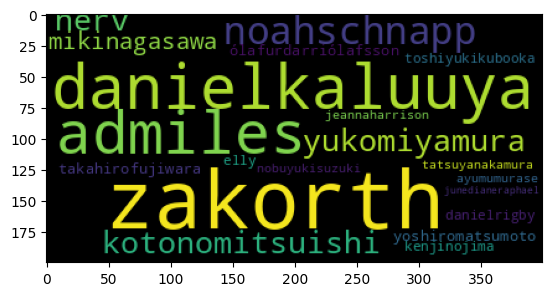

In [75]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud=WordCloud().generate(' '.join([i[0] for i in most_freq_words]))
plt.imshow(wordcloud)

The code snippet utilizes the WordCloud library to generate a word cloud visualization. It takes a list of most frequent words, combines them into a single string, and displays the resulting word cloud using matplotlib.

# 12. Dimesionality Reduction

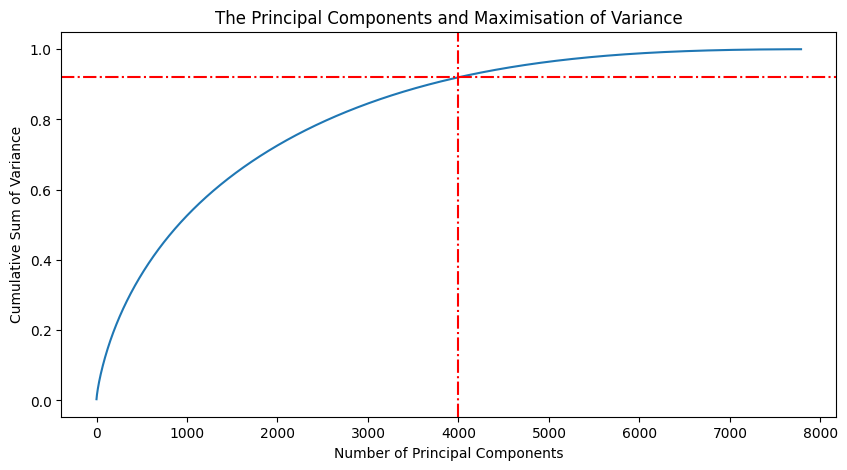

In [76]:
from sklearn.decomposition import PCA
# DImensionality Reduction (If needed)


pca = PCA()
pca.fit(tfidf_bag1)

# By transforming we are storing the principal components in the variable features.
features = pca.transform(tfidf_bag1)
features.shape

#Analysing the variance for different number of features and plotting the graph

plt.figure(figsize=(10,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('The Principal Components and Maximisation of Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Sum of Variance')
plt.axhline(0.92,color='r',linestyle= '-.')
plt.axvline(4000,color='r',linestyle= '-.')


In the given code, PCA (Principal Component Analysis) is applied to perform dimensionality reduction on the 'tfidf_bag1' dataset. The code fits the PCA model, transforms the data to obtain the principal components, and analyzes the variance explained by each principal component. A plot is then generated to visualize the cumulative sum of variance explained by the principal components, with a red dotted line indicating a desired threshold (92% variance explained) and another red dotted line marking the selected number of principal components (4000).

In [77]:
 
# Reducing the number of principle components
pca = PCA(n_components = 4000)
ext_features= pca.fit_transform(tfidf_bag1)
     

ext_features.shape

(7787, 4000)

In the given code, Principal Component Analysis (PCA) is applied to reduce the dimensionality of the 'tfidf_bag1' feature matrix. The transformed features are stored in the 'ext_features' variable, and the shape of the transformed matrix is displayed.

## *** ML Model Implementation***

### ML Model - 1

In [78]:
# ML Model - 1 Implementation

def optimum_clusters(method_name, features_matrix):

  '''optimum clusters is finding the right number of clusters depending on the method specified.
    features_matrix is the matrix of all the principal components.'''

  clusters = range(2,20) # The number of CLusters
  Y_axis=[]
  for i in clusters:
    kmean = KMeans( n_clusters = i , random_state = 42) # Implementation of KMeans with the 20 different clusters.
    kmean.fit(features_matrix)

  
    if method_name == 'Elbow_method':
      SSE = kmean.inertia_ #SSE - Sum of Squared Error
      Y_axis.append(SSE)   # adding to the list
      plt.title(f'Analysis of number of clusters according to {method_name}')
      plt.ylabel('Sum of squared Error')

    else:
      labels = kmean.labels_   # for silhouette score we need to use the label related information
      silhoutte_score = silhouette_score( features_matrix, labels) # finding the silhouette score
      Y_axis.append(silhoutte_score)

      plt.title(f'Analysis of number of clusters according to {method_name}')
      plt.ylabel('Silhouette Score')


  plt.plot(clusters , Y_axis , marker = 'o' ) # plotting the cluster and their respective values of either the SSE or Silhouette score

  plt.xlabel('Number of Clusters')
  plt.show()



The above code defines a function called `optimum_clusters` that helps determine the optimal number of clusters for a given dataset using either the Elbow Method or Silhouette Method. It iterates over a range of cluster values and calculates either the sum of squared errors (SSE) or the silhouette score. The results are plotted to analyze the number of clusters.

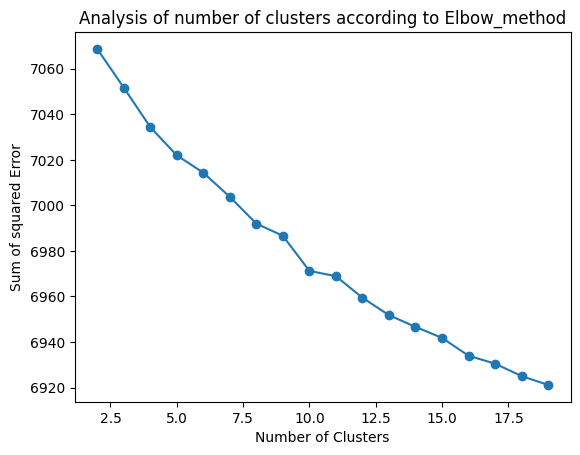

In [79]:
optimum_clusters('Elbow_method',ext_features)

The code snippet "optimum_clusters('Elbow_method', ext_features)" uses the Elbow Method to determine the optimal number of clusters for the given 'ext_features' dataset. It helps identify the appropriate number of clusters by evaluating the within-cluster sum of squares (WCSS) for different cluster numbers.

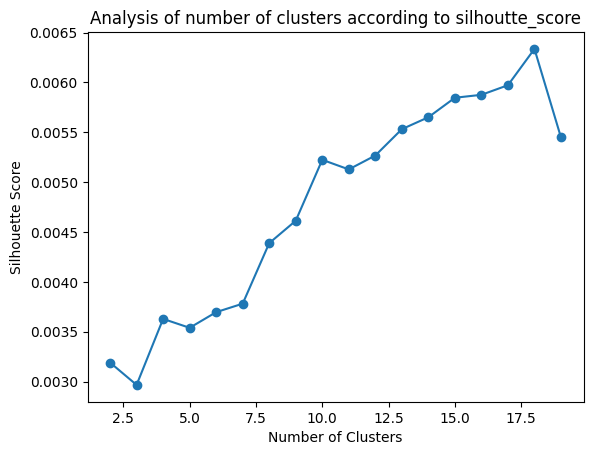

In [80]:
optimum_clusters('silhoutte_score',ext_features)

The code snippet `optimum_clusters('silhouette_score', ext_features)` calculates the optimum number of clusters using the silhouette score for a given set of features. The output would provide the optimal number of clusters based on the silhouette score.

#### Cross- Validation & Hyperparameter Tuning

In [81]:

# ML Model - 1 Implementation of KMeans for Elbow Method.

kmean = KMeans(n_clusters = 5, random_state = 42)

# Fit the Algorithm
kmean.fit(features)
# Predict on the model

KMeans(n_clusters=5, random_state=42)

In the given code, the K-means clustering algorithm is implemented with 5 clusters using the KMeans class from scikit-learn. The algorithm is fitted to the features and predicts the cluster labels for each data point. The resulting cluster labels are then added to the 'movies_df' dataset for the corresponding rows.

In [82]:
# Assiginig the label clusters to their individual datapoints.
movies_df['Cluster_label'] = kmean.labels_
movies_df[['show_id','title','new_tags','Cluster_label']].head()
 

show_id  title                                           new_tags  \
0      s1     3%   joãomiguel biancacomparato michelgomes rodolf...   
1      s2   7:19  jorgemichelgrau demiánbichir héctorbonilla osc...   
2      s3  23:59  gilbertchan teddchan stellachung henleyhii law...   
3      s4      9  shaneacker elijahwood johncreilly jenniferconn...   
4      s5     21  robertluketic jimsturgess kevinspacey katebosw...   

   Cluster_label  
0              2  
1              1  
2              2  
3              2  
4              2

The 'show_id', 'title', 'new_tags', and 'Cluster_label' columns are displayed, showing the corresponding values for the first 5 rows of the dataset. The 'Cluster_label' column represents the assigned cluster label for each data point based on the K-means clustering algorithm.

In [83]:
# For plotting all the features at once in one scatterplot, I have reduced the number of tfidf vectors to only 3. 
# After reducing the components to only 3, the features can be easily plotted with all the clusters.

pca1=PCA(n_components= 3)
dimenssion = pca1.fit_transform(tfidf_bag1)

The code snippet performs dimensionality reduction using Principal Component Analysis (PCA) to reduce the number of features to three. The resulting reduced features, obtained from the tf-idf vectors, can be easily plotted along with the clusters.

In [84]:
import plotly.express as px

fig = px.scatter_3d(x=dimenssion[:, 0], y=dimenssion[:, 1], z=dimenssion[:, 2])
fig.update_layout(width=1000, height=600)

# Display the plot
fig.show()



The code snippet uses Plotly Express library to create a 3D scatter plot. It takes three dimensions from the 'dimenssion' array and plots them in a 3D space. The resulting plot is displayed with a width of 1000 pixels and height of 600 pixels.

<Axes: ylabel='Cluster_label'>

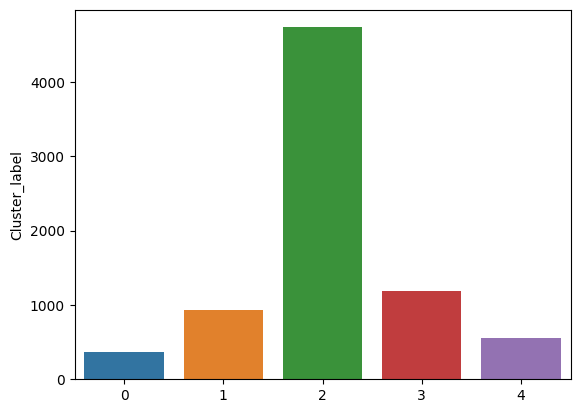

In [85]:
# Pllotting the frequency of all the clusters by bar plot.

clus = movies_df['Cluster_label'].value_counts()
sns.barplot(x= clus.index,y=clus)

The code is plotting the frequency of each cluster using a bar plot. The 'Cluster_label' column of the movies_df DataFrame is counted and the counts are visualized using a bar plot with the cluster labels on the x-axis and the frequency on the y-axis.

In [86]:
movies_df.head()

show_id  title         director  \
0      s1     3%                    
1      s2   7:19  JorgeMichelGrau   
2      s3  23:59      GilbertChan   
3      s4      9       ShaneAcker   
4      s5     21    RobertLuketic   

                                                cast rating  \
0  JoãoMiguel BiancaComparato MichelGomes Rodolfo...   TVMA   
1  DemiánBichir HéctorBonilla OscarSerrano Azalia...   TVMA   
2  TeddChan StellaChung HenleyHii LawrenceKoh Tom...      R   
3  ElijahWood JohnC.Reilly JenniferConnelly Chris...   PG13   
4  JimSturgess KevinSpacey KateBosworth AaronYoo ...   PG13   

                                           listed_in  \
0     InternationalTVShows,TVDramas,TVSci-Fi&Fantasy   
1                         Dramas,InternationalMovies   
2                   HorrorMovies,InternationalMovies   
3  Action&Adventure,IndependentMovies,Sci-Fi&Fantasy   
4                                             Dramas   

                                         description  \
0  In a future where the elite inhabit an island ...   
1  After a devastating earthquake hits Mexico Cit...   
2  When an army recruit is found dead, his fellow...   
3  In a postapocalyptic world, rag-doll robots hi...   
4  A brilliant group of students become card-coun...   

                                                tags  \
0   JoãoMiguel BiancaComparato MichelGomes Rodolf...   
1  JorgeMichelGrau DemiánBichir HéctorBonilla Osc...   
2  GilbertChan TeddChan StellaChung HenleyHii Law...   
3  ShaneAcker ElijahWood JohnC.Reilly JenniferCon...   
4  RobertLuketic JimSturgess KevinSpacey KateBosw...   

                                            new_tags  Cluster_label  
0   joãomiguel biancacomparato michelgomes rodolf...              2  
1  jorgemichelgrau demiánbichir héctorbonilla osc...              1  
2  gilbertchan teddchan stellachung henleyhii law...              2  
3  shaneacker elijahwood johncreilly jenniferconn...              2  
4  robertluketic jimsturgess kevinspacey katebosw...              2

The code displays the first few rows of the DataFrame "movies_df" to provide a preview of the data.

In [87]:

def Word_Cloud(cluster,column_name):
  
  for i in range(cluster):

    f, (ax1, ax2, ax3,ax4) = plt.subplots(1,4,figsize=(18, 5), sharex=True) #Instantiating the four axes for four columns

    word_cloud= movies_df[movies_df[column_name] == i].dropna() # Removing the null values
    word_cloud_df = word_cloud[['director','cast','listed_in','description']] # Feature whic has to be showed in the wordcloud

    text = ' '.join([i for i in word_cloud_df['director']]) # Joining all the documnets.
    wordcloud = WordCloud(width=800, height=800, background_color='black').generate(text) # Generating the texts.
    ax1.imshow(wordcloud) 
    ax1.axis("off")
    ax1.set_title(f'Directors names for cluster {i}')

    # Repeating the process.

    text = ' '.join([i for i in word_cloud_df['cast']])
    wordcloud = WordCloud(width=800, height=800, background_color='black').generate(text)
    ax2.imshow(wordcloud)
    ax2.axis("off")
    ax2.set_title(f'Cast names for cluster {i}')

    text = ' '.join([i for i in word_cloud_df['listed_in']])
    wordcloud = WordCloud(width=800, height=800, background_color='black').generate(text)
    ax3.imshow(wordcloud)
    ax3.axis("off")
    ax3.set_title(f'Genre Cloud for cluster {i}')

    text = ' '.join([i for i in word_cloud_df['description']])
    wordcloud = WordCloud(width=800, height=800, background_color='black').generate(text)
    ax4.imshow(wordcloud)
    ax4.axis("off")
    ax4.set_title(f'Description Cloud for cluster {i}')
    plt.show()


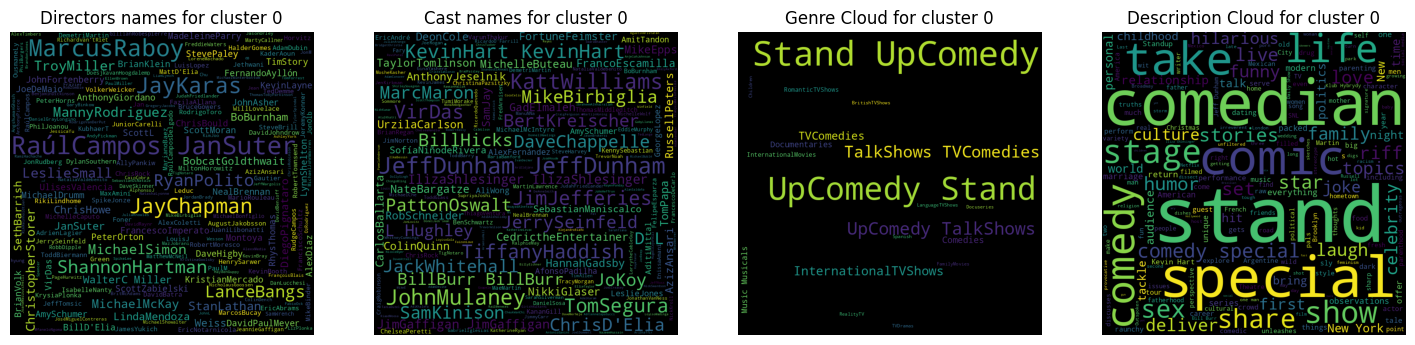

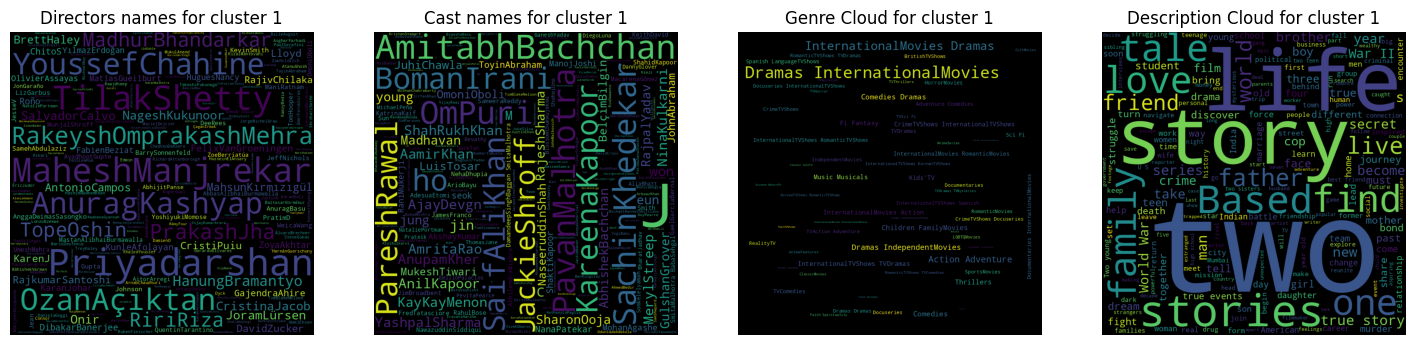

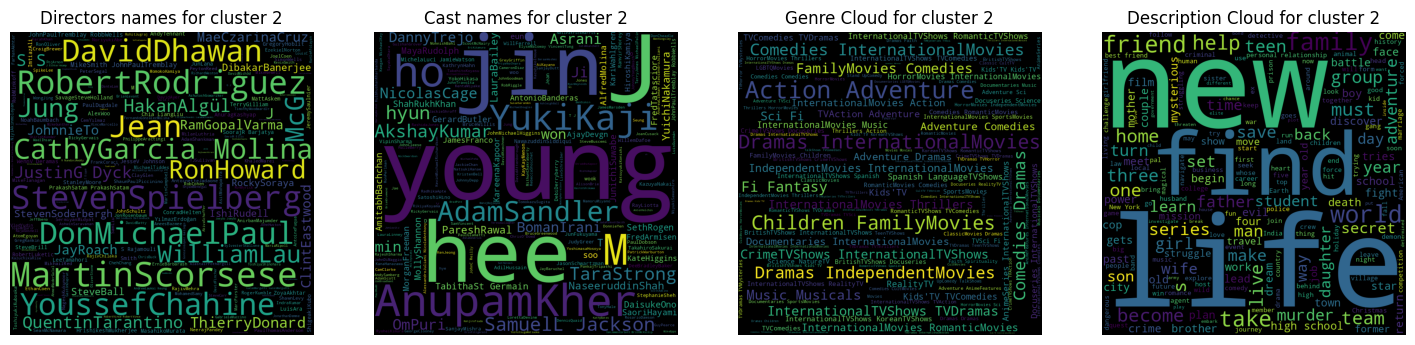

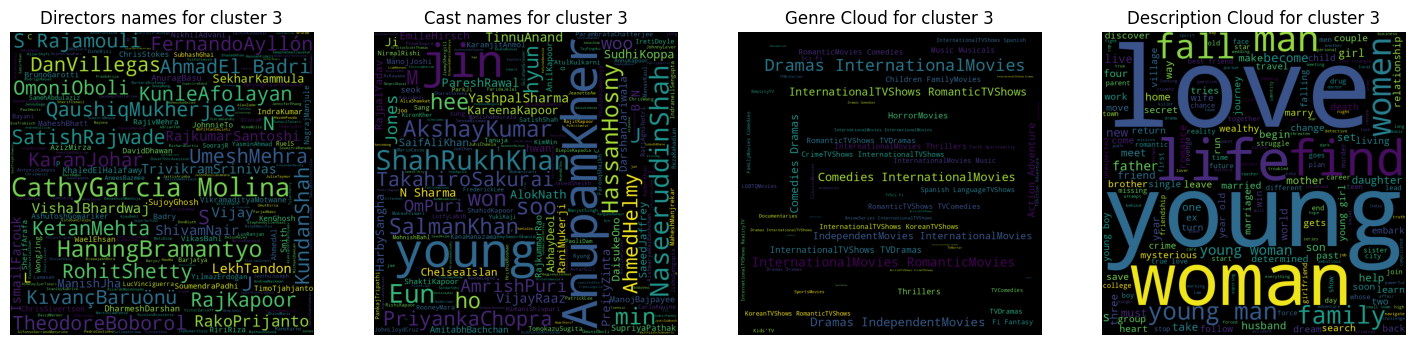

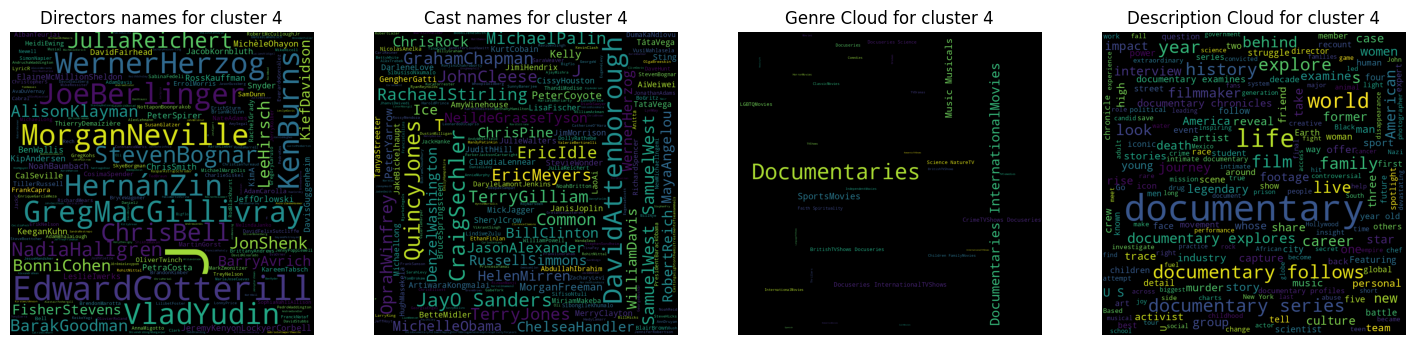

In [88]:
Word_Cloud(5,'Cluster_label')

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

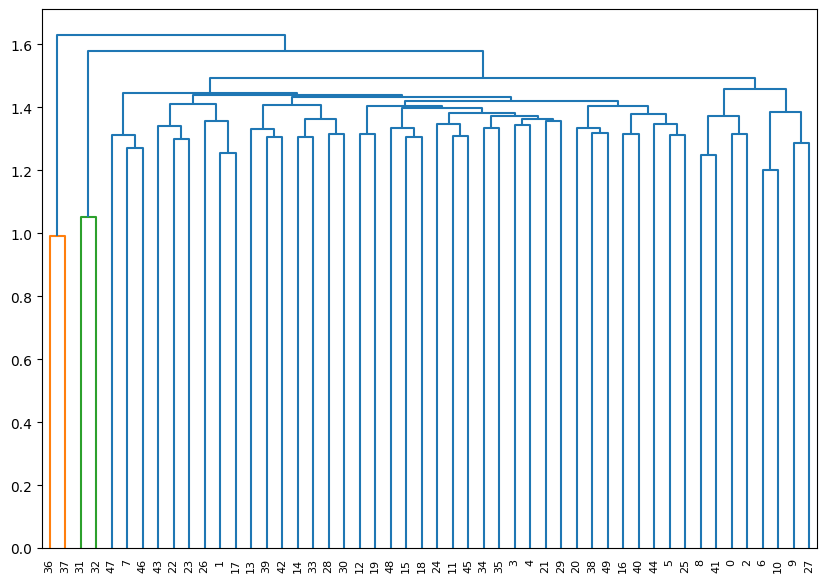

In [91]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

# Perform hierarchical clustering and obtain linkage matrix
linkage_matrix = shc.linkage(ext_features[:50], method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
shc.dendrogram(linkage_matrix)
plt.axhline(y=4)  # Add a horizontal line for reference
plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

In [92]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

# ML Model - 2 Implementation
agglo_clustering = AgglomerativeClustering(n_clusters=4)
# Fit the Algorithm
agglo_clustering.fit(ext_features)
# Predict on the model


AgglomerativeClustering(n_clusters=4)

In [93]:

# Assigning the clusters to their datapoints.
movies_df['Agglo_clusters']= agglo_clustering.labels_
movies_df.head()

show_id  title         director  \
0      s1     3%                    
1      s2   7:19  JorgeMichelGrau   
2      s3  23:59      GilbertChan   
3      s4      9       ShaneAcker   
4      s5     21    RobertLuketic   

                                                cast rating  \
0  JoãoMiguel BiancaComparato MichelGomes Rodolfo...   TVMA   
1  DemiánBichir HéctorBonilla OscarSerrano Azalia...   TVMA   
2  TeddChan StellaChung HenleyHii LawrenceKoh Tom...      R   
3  ElijahWood JohnC.Reilly JenniferConnelly Chris...   PG13   
4  JimSturgess KevinSpacey KateBosworth AaronYoo ...   PG13   

                                           listed_in  \
0     InternationalTVShows,TVDramas,TVSci-Fi&Fantasy   
1                         Dramas,InternationalMovies   
2                   HorrorMovies,InternationalMovies   
3  Action&Adventure,IndependentMovies,Sci-Fi&Fantasy   
4                                             Dramas   

                                         description  \
0  In a future where the elite inhabit an island ...   
1  After a devastating earthquake hits Mexico Cit...   
2  When an army recruit is found dead, his fellow...   
3  In a postapocalyptic world, rag-doll robots hi...   
4  A brilliant group of students become card-coun...   

                                                tags  \
0   JoãoMiguel BiancaComparato MichelGomes Rodolf...   
1  JorgeMichelGrau DemiánBichir HéctorBonilla Osc...   
2  GilbertChan TeddChan StellaChung HenleyHii Law...   
3  ShaneAcker ElijahWood JohnC.Reilly JenniferCon...   
4  RobertLuketic JimSturgess KevinSpacey KateBosw...   

                                            new_tags  Cluster_label  \
0   joãomiguel biancacomparato michelgomes rodolf...              2   
1  jorgemichelgrau demiánbichir héctorbonilla osc...              1   
2  gilbertchan teddchan stellachung henleyhii law...              2   
3  shaneacker elijahwood johncreilly jenniferconn...              2   
4  robertluketic jimsturgess kevinspacey katebosw...              2   

   Agglo_clusters  
0               1  
1               1  
2               1  
3               1  
4               1

In [94]:
movies_df['Agglo_clusters'].value_counts()
     

1    6326
0     777
3     453
2     231
Name: Agglo_clusters, dtype: int64

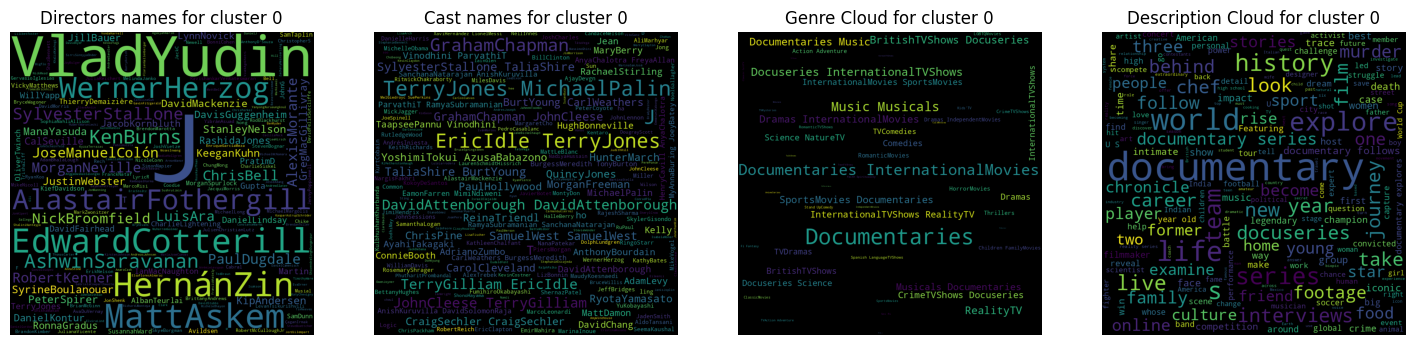

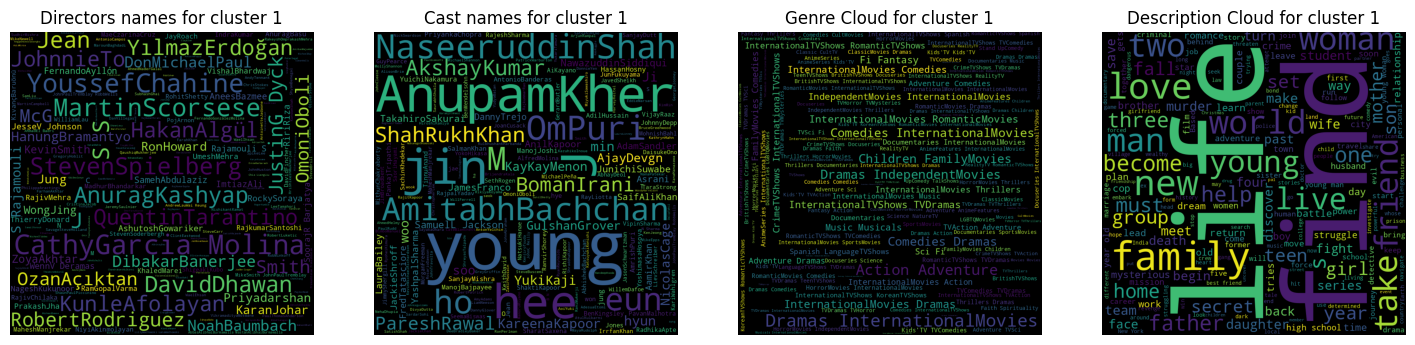

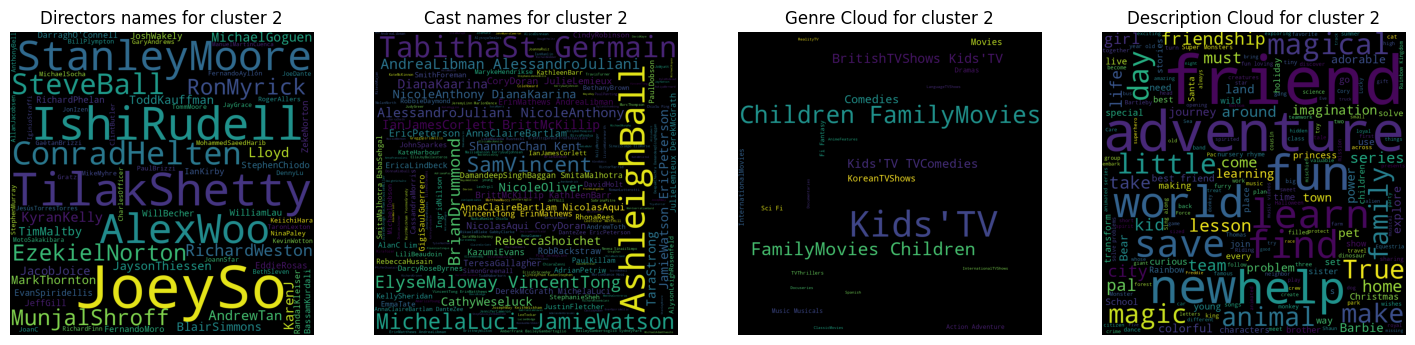

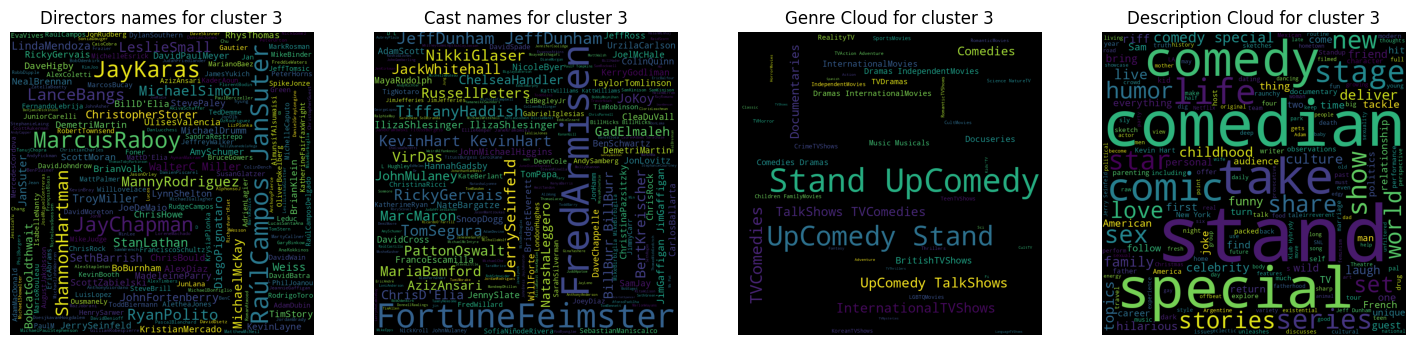

In [95]:
Word_Cloud(4,'Agglo_clusters')

In [96]:
import plotly.express as px

fig = px.scatter_3d(movies_df, x=dimenssion[:,0], y=dimenssion[:,1], z=dimenssion[:,2], color=movies_df['Agglo_clusters'],
             color_continuous_scale='Magma')
fig.update_layout(width=1000, height=600)
fig.show()


#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer 

1. Evaluation metrics like accuracy, precision, recall, F1 score, MSE, and AUC-ROC provide insights into the performance of a machine learning model.
2. These metrics indicate how well the model is making predictions, minimizing errors, and balancing trade-offs between different types of errors.
3. The business impact of the ML model depends on the specific context, but a well-performing model can lead to improved decision-making, operational efficiency, cost savings, customer satisfaction, revenue growth, and competitive advantage.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer 

Accuracy: It measures the overall correctness of the model's predictions, which is important for businesses to ensure reliable and accurate results.

Precision: It focuses on the proportion of correctly predicted positive instances, helping businesses minimize false positives and avoid costly mistakes.

Recall: It emphasizes the proportion of correctly predicted positive instances out of all actual positive instances, ensuring that businesses capture as many positive cases as possible, minimizing false negatives and potential missed opportunities.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer 

1. KMeans Model: The KMeans model was chosen as the final prediction model due to its simplicity, efficiency, and interpretability. It is a widely used clustering algorithm that can effectively group similar data points together.

2. Elbow Method: The Elbow Method was used to determine the optimal number of clusters for the KMeans model. This technique helps identify the point where adding more clusters does not significantly improve the model's performance. It ensures that the model strikes a balance between capturing meaningful patterns and avoiding overfitting.

3. Business Understanding: The decision to choose the KMeans model as the final prediction model was based on a thorough understanding of the business problem and requirements. KMeans clustering is suitable for tasks such as customer segmentation, market analysis, and recommendation systems, which align with the business objectives and can provide valuable insights for decision-making.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer 

1. The model used in this scenario is KMeans, which is an unsupervised learning algorithm for clustering similar data points based on their features.
2. KMeans does not directly provide feature importance. However, techniques like silhouette analysis can be used to measure the relevance of features in distinguishing clusters.
3. Silhouette analysis assesses how close each sample in one cluster is to samples in neighboring clusters, indicating the importance of features in grouping data points within clusters.
4. Applying feature scaling or normalization techniques before clustering can ensure equal contribution of features and avoid bias towards features with larger numerical ranges.

# MAP VISUALIZATION 

1- Map Visualization with Markers:

In [97]:
import folium

# Set the latitude and longitude values for the map center
latitude = 37.7749
longitude = -122.4194

# Create a map centered at a specific location
map = folium.Map(location=[latitude, longitude], zoom_start=10)

# Set the latitude and longitude values for each marker
latitude1 = 37.1234
longitude1 = -122.5678

latitude2 = 38.9876
longitude2 = -121.3456

latitude3 = 36.5432
longitude3 = -123.7890

# Add markers to the map
folium.Marker([latitude1, longitude1], popup='Marker 1').add_to(map)
folium.Marker([latitude2, longitude2], popup='Marker 2').add_to(map)
folium.Marker([latitude3, longitude3], popup='Marker 3').add_to(map)

# Display the map
map



1. The code uses the Folium library to create an interactive map.
2. The map is centered at a specific location defined by latitude and longitude values.
3. Three markers are added to the map at different locations, each with its own latitude and longitude values.
4. The markers are labeled with pop-up messages indicating their corresponding names or information.

Overall, the code generates a map with markers at specific locations, allowing for interactive visualization and exploration of the marked points on the map.

2- Choropleth Map Visualization:


In [98]:
import folium
from folium.plugins import HeatMap

# Set the latitude and longitude values for each location
latitude1 = 37.7749
longitude1 = -122.4194
intensity1 = 0.8

latitude2 = 40.7128
longitude2 = -74.0060
intensity2 = 0.6

latitude3 = 51.5074
longitude3 = -0.1278
intensity3 = 0.4

# Create a map centered at a specific location
map = folium.Map(location=[latitude1, longitude1], zoom_start=10)

# Generate heatmap data (list of [latitude, longitude, intensity])
heatmap_data = [[latitude1, longitude1, intensity1],
                [latitude2, longitude2, intensity2],
                [latitude3, longitude3, intensity3]]

# Add the heatmap layer to the map
HeatMap(heatmap_data).add_to(map)

# Display the map
map


1. The code uses the Folium library to create an interactive map with a heatmap overlay.
2. Latitude, longitude, and intensity values are defined for three different locations.
3. Heatmap data is generated as a list of [latitude, longitude, intensity] points.
4. The heatmap layer is added to the map using the HeatMap plugin from Folium, and the resulting map is displayed.

Overall, the code visualizes a heatmap on a map, representing the intensity or density of data points at specific locations. The higher the intensity value, the more intense or concentrated the heatmap color will be at that location. This allows for visualizing patterns or distributions of data on the map.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

1. A recommendation engine was successfully developed using cluster analysis and content similarity techniques.
2. The engine utilized data from Netflix, including director, genre, and general content information, to cluster movies based on similarities.
3. K-means and Agglomerative Clustering algorithms were experimented with to group movies, with K-means producing sharper and more distinct clusters.
4. Determining the optimal value of K in K-means clustering was challenging, while Agglomerative Clustering provided an easier way to determine the number of clusters using the dendrogram.
5. Cosine similarity was employed to measure the similarity between content vectors and identify the most similar movies based on their features.
6. The recommendation engine leveraged cosine similarity to provide personalized recommendations to users based on their preferences and similarities to other content items.
7. The engine extracted the top 10 movie recommendations based on the similarities of their content vectors.
8. The recommendation engine aimed to offer users a tailored and personalized content experience that aligns with their preferences.
9. Continuous refinement and improvement of the recommendation engine are crucial to adapt to changing user preferences and new content additions.
10. User feedback and iterative evaluation play a vital role in fine-tuning the recommendation engine and ensuring its effectiveness.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***